In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt   
import seaborn as sns  

# Load the Data-set

In [2]:
ai_job = pd.read_csv("ai_job_dataset.csv")

In [3]:
ai_job.head()

job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada            M   
2               MI              FL      Switzerland            L   
3               SE              FL            India            M   
4               EN              PT           France            S   

  employee_residence  remote_ratio  \
0              China            50   
1            Ireland           100   
2        South Korea             0   
3              India            50   
4          Singapore           100   

                                   required_skills education_required  \
0         Tableau, PyTorch, Kubernetes, Linux, NLP           Bachelor   
1  Deep Learning, AWS, Mathematics, Python, Docker             Master   
2     Kubernetes, Deep Learning, Java, Hadoop, NLP          Associate   
3                        Scala, SQL, Linux, Python                PhD   
4                     MLOps, Java, Tableau, Python             Master   

   years_experience    industry posting_date application_deadline  \
0                 9  Automotive   2024-10-18           2024-11-07   
1                 1       Media   2024-11-20           2025-01-11   
2                 2   Education   2025-03-18           2025-04-07   
3                 7  Consulting   2024-12-23           2025-02-24   
4                 0       Media   2025-04-15           2025-06-23   

   job_description_length  benefits_score       company_name  
0                    1076             5.9    Smart Analytics  
1                    1268             5.2       TechCorp Inc  
2                    1974             9.4    Autonomous Tech  
3                    1345             8.6     Future Systems  
4                    1989             6.6  Advanced Robotics

In [4]:
ai_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [5]:
ai_job.describe()

salary_usd  remote_ratio  years_experience  job_description_length  \
count   15000.000000  15000.000000      15000.000000            15000.000000   
mean   115348.965133     49.483333          6.253200             1503.314733   
std     60260.940438     40.812712          5.545768              576.127083   
min     32519.000000      0.000000          0.000000              500.000000   
25%     70179.750000      0.000000          2.000000             1003.750000   
50%     99705.000000     50.000000          5.000000             1512.000000   
75%    146408.500000    100.000000         10.000000             2000.000000   
max    399095.000000    100.000000         19.000000             2499.000000   

       benefits_score  
count    15000.000000  
mean         7.504273  
std          1.450870  
min          5.000000  
25%          6.200000  
50%          7.500000  
75%          8.800000  
max         10.000000

In [6]:
ai_job.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [7]:
ai_job['application_deadline'].head()

0    2024-11-07
1    2025-01-11
2    2025-04-07
3    2025-02-24
4    2025-06-23
Name: application_deadline, dtype: object

In [8]:
type(ai_job['application_deadline'][0])

str

Here application deadline columns date in the form of string so i want to convert into timestamp

In [9]:
ai_job['application_deadline'] = pd.to_datetime(ai_job['application_deadline'])

In [10]:
ai_job['application_deadline'].head(5)

0   2024-11-07
1   2025-01-11
2   2025-04-07
3   2025-02-24
4   2025-06-23
Name: application_deadline, dtype: datetime64[ns]

In [11]:
type(ai_job['application_deadline'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
ai_job['benefits_score'].value_counts()

benefits_score
9.9     338
9.2     334
8.5     331
5.1     329
5.5     329
6.5     326
9.0     325
8.6     316
5.6     314
8.3     314
8.9     313
7.3     312
6.4     309
8.8     309
8.1     309
9.4     308
7.6     307
7.1     307
5.7     306
9.3     304
9.8     304
7.9     304
5.3     302
5.4     302
6.8     301
7.4     301
6.1     296
5.2     296
6.9     294
5.8     294
7.5     294
7.7     294
8.0     293
9.1     293
9.7     292
6.6     289
6.3     286
6.2     285
6.0     285
7.2     284
6.7     282
8.4     282
9.6     281
7.0     281
5.9     277
7.8     276
8.7     276
9.5     273
8.2     262
10.0    142
5.0     139
Name: count, dtype: int64

In [13]:
ai_job['company_location'].unique()

array(['China', 'Canada', 'Switzerland', 'India', 'France', 'Germany',
       'United Kingdom', 'Singapore', 'Austria', 'Sweden', 'South Korea',
       'Norway', 'Netherlands', 'United States', 'Israel', 'Australia',
       'Ireland', 'Denmark', 'Finland', 'Japan'], dtype=object)

In [14]:
ai_job['company_location'].value_counts()

company_location
Germany           814
Denmark           778
Canada            769
France            769
Austria           765
Singapore         764
China             763
India             754
Sweden            752
Israel            751
Ireland           750
Switzerland       746
Japan             733
Finland           733
Australia         732
Netherlands       731
United Kingdom    729
United States     724
South Korea       722
Norway            721
Name: count, dtype: int64

In [15]:
ai_job['company_name'].unique()

array(['Smart Analytics', 'TechCorp Inc', 'Autonomous Tech',
       'Future Systems', 'Advanced Robotics', 'Neural Networks Co',
       'DataVision Ltd', 'Cloud AI Solutions', 'Quantum Computing Inc',
       'Predictive Systems', 'AI Innovations', 'Algorithmic Solutions',
       'Cognitive Computing', 'DeepTech Ventures',
       'Machine Intelligence Group', 'Digital Transformation LLC'],
      dtype=object)

In [16]:
ai_job['company_name'].value_counts()

company_name
TechCorp Inc                  980
Cognitive Computing           972
AI Innovations                964
Digital Transformation LLC    961
Quantum Computing Inc         960
Future Systems                960
Cloud AI Solutions            951
Predictive Systems            947
Smart Analytics               927
Advanced Robotics             925
Neural Networks Co            922
Machine Intelligence Group    922
Autonomous Tech               918
DataVision Ltd                909
DeepTech Ventures             897
Algorithmic Solutions         885
Name: count, dtype: int64

In [17]:
ai_job['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

In [18]:
ai_job['company_size'].value_counts()

company_size
S    5007
L    4998
M    4995
Name: count, dtype: int64

In [19]:
ai_job['education_required'].value_counts()

education_required
Bachelor     3789
Associate    3785
Master       3748
PhD          3678
Name: count, dtype: int64

In [20]:
ai_job['employee_residence'].value_counts()

employee_residence
Sweden            790
France            781
Denmark           777
Austria           776
India             772
Germany           769
South Korea       763
Canada            762
China             761
Netherlands       758
United Kingdom    750
Switzerland       748
Ireland           740
Singapore         740
Israel            731
Australia         730
Norway            726
United States     716
Finland           710
Japan             700
Name: count, dtype: int64

In [21]:
ai_job['employment_type'].value_counts()

employment_type
FT    3812
FL    3758
CT    3721
PT    3709
Name: count, dtype: int64

In [22]:
ai_job['experience_level'].value_counts()

experience_level
MI    3781
EX    3760
SE    3741
EN    3718
Name: count, dtype: int64

In [23]:
ai_job['industry'].value_counts()

industry
Retail                1063
Media                 1045
Automotive            1020
Consulting            1020
Technology            1011
Real Estate           1007
Government             998
Transportation         997
Telecommunications     997
Healthcare             997
Finance                984
Energy                 976
Gaming                 967
Manufacturing          962
Education              956
Name: count, dtype: int64

In [24]:
ai_job['job_description_length'].value_counts()

job_description_length
1519    19
1747    18
1957    17
1617    17
1176    16
        ..
2032     1
1138     1
2348     1
1530     1
764      1
Name: count, Length: 2000, dtype: int64

In [25]:
ai_job['job_title'].value_counts()

job_title
Machine Learning Researcher    808
AI Software Engineer           784
Autonomous Systems Engineer    777
Machine Learning Engineer      772
AI Architect                   771
Head of AI                     765
NLP Engineer                   762
Robotics Engineer              759
Data Analyst                   759
AI Research Scientist          756
Data Engineer                  749
AI Product Manager             743
Research Scientist             742
Principal Data Scientist       734
AI Specialist                  728
ML Ops Engineer                725
Computer Vision Engineer       724
Data Scientist                 720
Deep Learning Engineer         718
AI Consultant                  704
Name: count, dtype: int64

In [26]:
type(ai_job['posting_date'][0])

str

In [27]:
ai_job['posting_date'] = pd.to_datetime(ai_job['posting_date'])

In [28]:
type(ai_job['posting_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [29]:
ai_job['remote_ratio'].value_counts()

remote_ratio
0      5075
50     5005
100    4920
Name: count, dtype: int64

In [30]:
ai_job['required_skills'].value_counts()

required_skills
Python, TensorFlow, PyTorch                             17
Python, TensorFlow, Tableau                              9
Python, TensorFlow, Linux                                7
Python, TensorFlow, MLOps                                7
Python, TensorFlow, Data Visualization                   7
                                                        ..
Tableau, Java, R, Spark                                  1
Python, Spark, MLOps, Computer Vision, Deep Learning     1
R, Tableau, Git, Python, Java                            1
GCP, Git, Mathematics                                    1
Kubernetes, Spark, AWS, Git                              1
Name: count, Length: 13663, dtype: int64

In [31]:
ai_job['salary_currency'].unique()

array(['USD', 'EUR', 'GBP'], dtype=object)

In [32]:
ai_job['years_experience'].value_counts()

years_experience
0     1890
1     1828
4     1295
3     1247
2     1239
7      769
5      757
6      753
9      742
8      720
16     403
15     392
13     391
10     384
19     378
11     373
14     364
17     363
12     362
18     350
Name: count, dtype: int64

# Data visulization 

1 What is the distribution of experience levels (e.g Entery , mid , Senior , Executive ) across all jobs ?? 

In [33]:
ai_job.head()

job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada            M   
2               MI              FL      Switzerland            L   
3               SE              FL            India            M   
4               EN              PT           France            S   

  employee_residence  remote_ratio  \
0              China            50   
1            Ireland           100   
2        South Korea             0   
3              India            50   
4          Singapore           100   

                                   required_skills education_required  \
0         Tableau, PyTorch, Kubernetes, Linux, NLP           Bachelor   
1  Deep Learning, AWS, Mathematics, Python, Docker             Master   
2     Kubernetes, Deep Learning, Java, Hadoop, NLP          Associate   
3                        Scala, SQL, Linux, Python                PhD   
4                     MLOps, Java, Tableau, Python             Master   

   years_experience    industry posting_date application_deadline  \
0                 9  Automotive   2024-10-18           2024-11-07   
1                 1       Media   2024-11-20           2025-01-11   
2                 2   Education   2025-03-18           2025-04-07   
3                 7  Consulting   2024-12-23           2025-02-24   
4                 0       Media   2025-04-15           2025-06-23   

   job_description_length  benefits_score       company_name  
0                    1076             5.9    Smart Analytics  
1                    1268             5.2       TechCorp Inc  
2                    1974             9.4    Autonomous Tech  
3                    1345             8.6     Future Systems  
4                    1989             6.6  Advanced Robotics

In [34]:
ai_job['experience_level'].unique()

array(['SE', 'EN', 'MI', 'EX'], dtype=object)

In [35]:
def experience(exp):
    if exp == 'SE':
        return 'Senior-Level '
    elif exp == 'EN':
        return 'Entry-Level'
    elif exp == 'MI':
        return 'Mid-Level'
    elif exp == 'EX':
        return 'Executive-level'
    else:
        return 'Unknown'

In [36]:
ai_job['experience_level'] = ai_job['experience_level'].apply(experience)

In [37]:
ai_job['experience_level'].unique()

array(['Senior-Level ', 'Entry-Level', 'Mid-Level', 'Executive-level'],
      dtype=object)

In [38]:
ai_job.head()

job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0    Senior-Level               CT            China            M   
1      Entry-Level              CT           Canada            M   
2        Mid-Level              FL      Switzerland            L   
3    Senior-Level               FL            India            M   
4      Entry-Level              PT           France            S   

  employee_residence  remote_ratio  \
0              China            50   
1            Ireland           100   
2        South Korea             0   
3              India            50   
4          Singapore           100   

                                   required_skills education_required  \
0         Tableau, PyTorch, Kubernetes, Linux, NLP           Bachelor   
1  Deep Learning, AWS, Mathematics, Python, Docker             Master   
2     Kubernetes, Deep Learning, Java, Hadoop, NLP          Associate   
3                        Scala, SQL, Linux, Python                PhD   
4                     MLOps, Java, Tableau, Python             Master   

   years_experience    industry posting_date application_deadline  \
0                 9  Automotive   2024-10-18           2024-11-07   
1                 1       Media   2024-11-20           2025-01-11   
2                 2   Education   2025-03-18           2025-04-07   
3                 7  Consulting   2024-12-23           2025-02-24   
4                 0       Media   2025-04-15           2025-06-23   

   job_description_length  benefits_score       company_name  
0                    1076             5.9    Smart Analytics  
1                    1268             5.2       TechCorp Inc  
2                    1974             9.4    Autonomous Tech  
3                    1345             8.6     Future Systems  
4                    1989             6.6  Advanced Robotics

In [39]:
ai_job['experience_level'].value_counts()

experience_level
Mid-Level          3781
Executive-level    3760
Senior-Level       3741
Entry-Level        3718
Name: count, dtype: int64

In [40]:
grouped = ai_job.groupby(['job_title','experience_level']).size().reset_index(name='count')
grouped.head()

job_title experience_level  count
0   AI Architect      Entry-Level    155
1   AI Architect  Executive-level    196
2   AI Architect        Mid-Level    213
3   AI Architect    Senior-Level     207
4  AI Consultant      Entry-Level    173

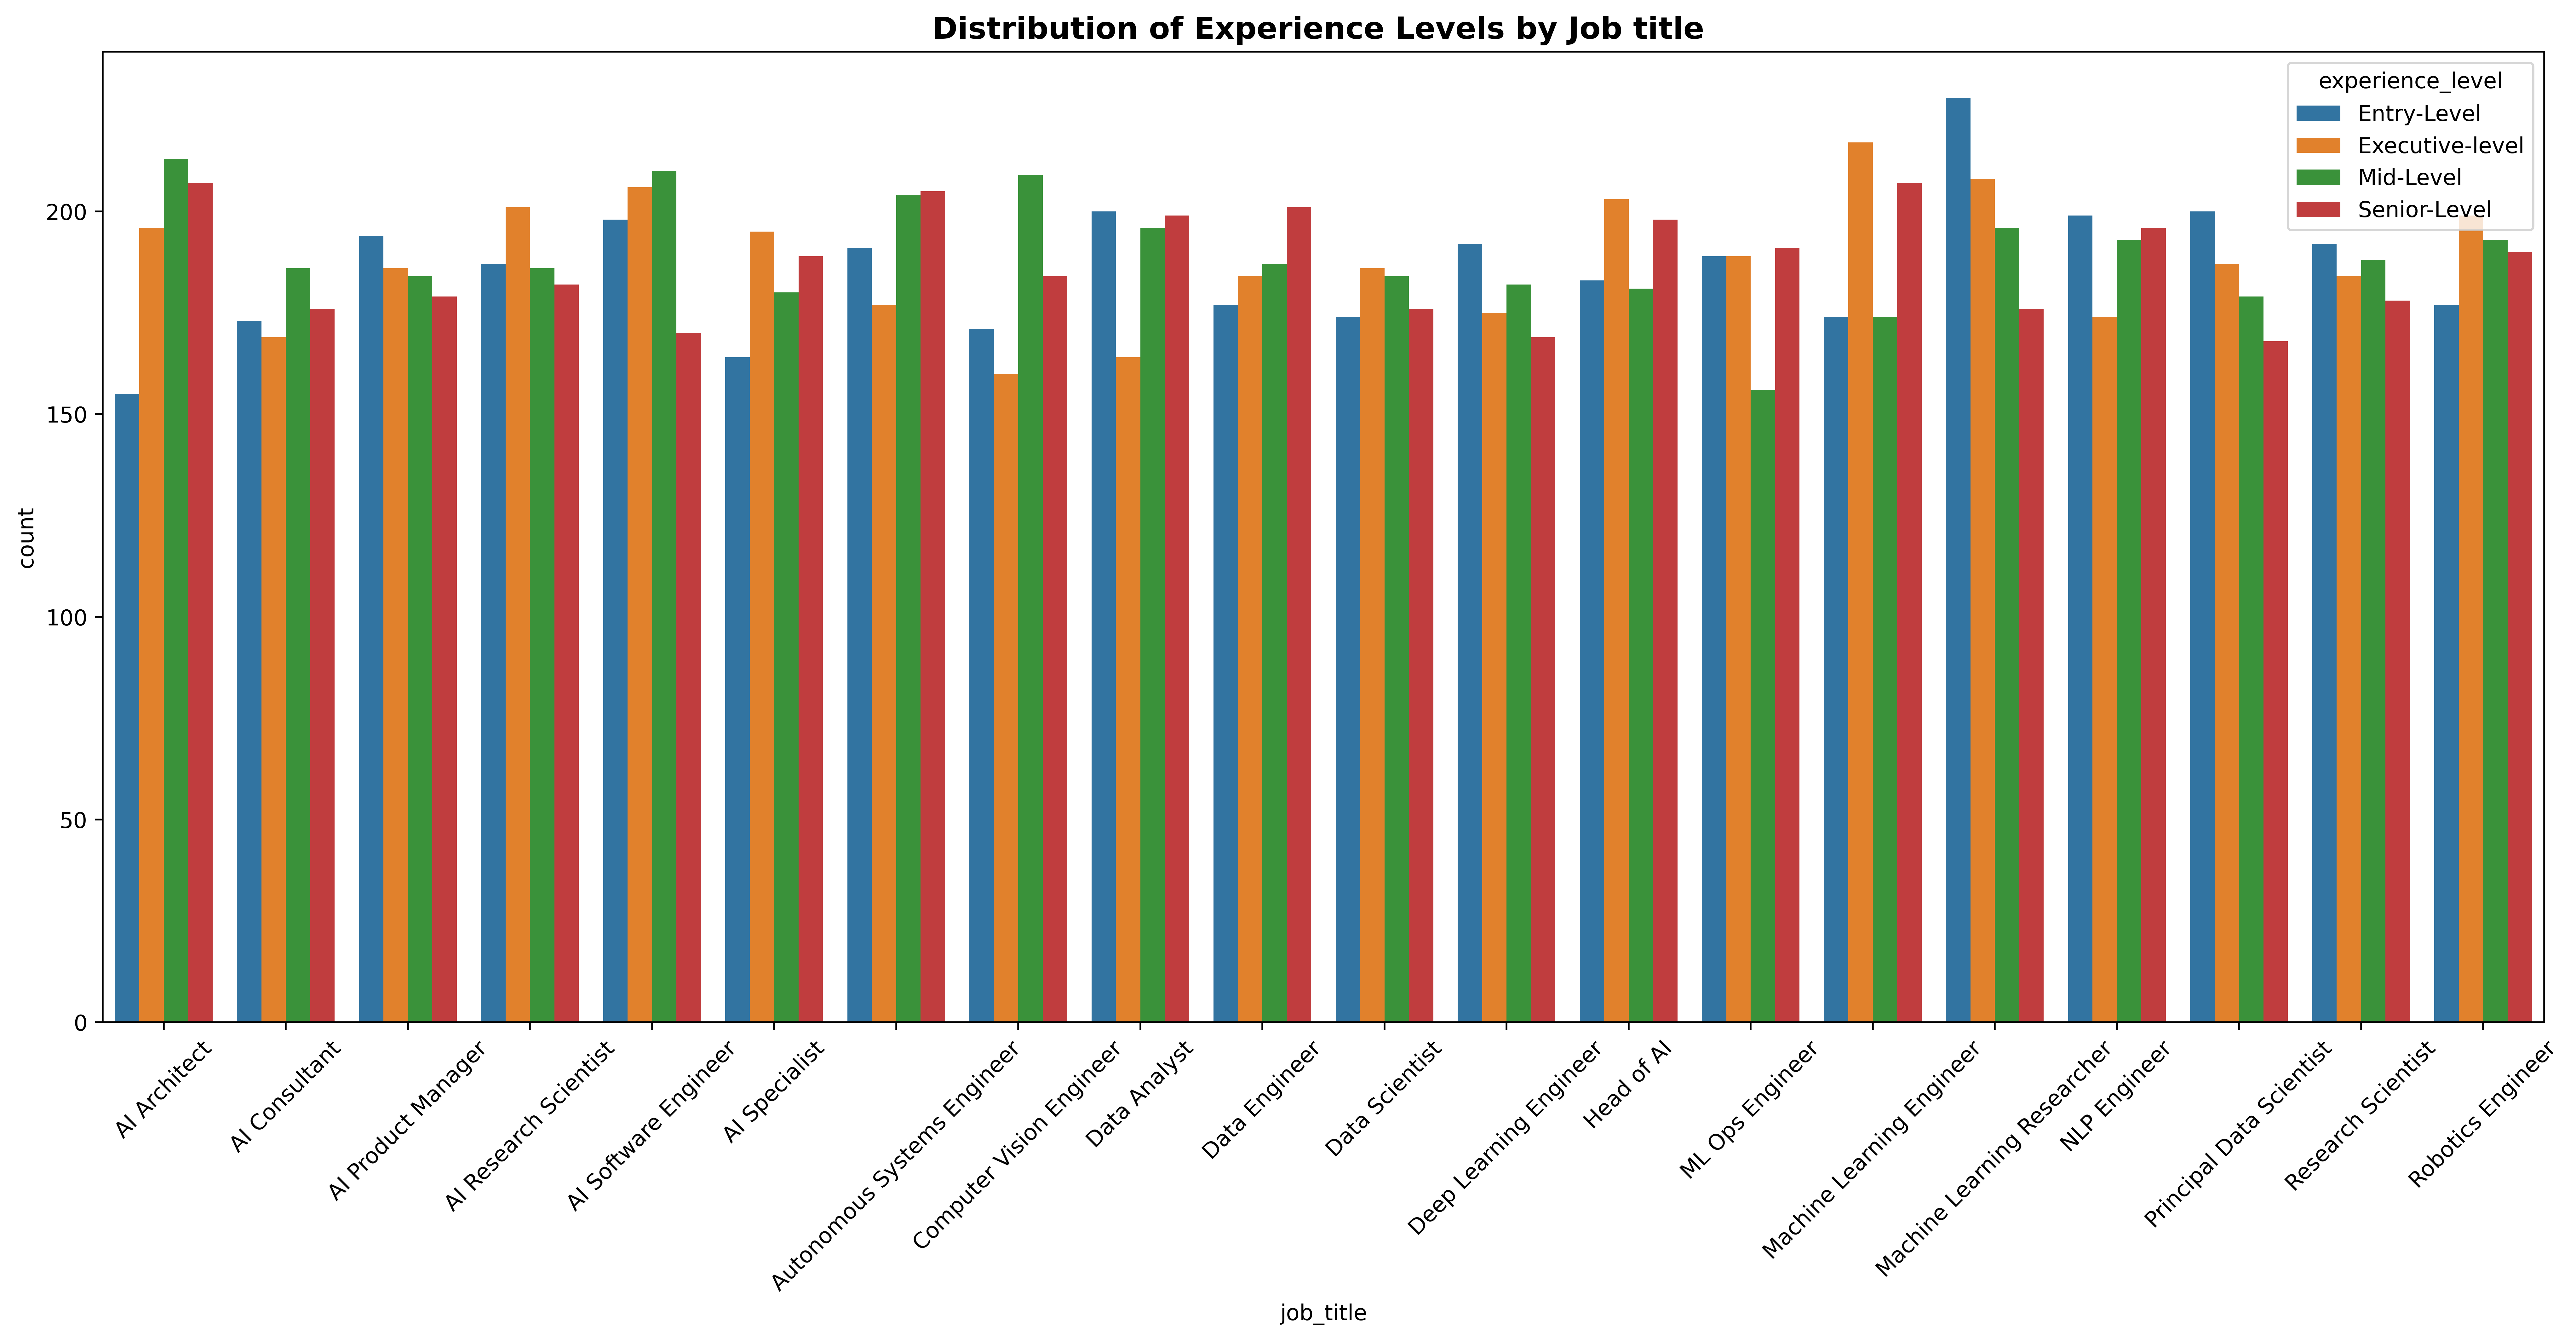

In [41]:
plt.figure(figsize=(20,8) , dpi = 500)
sns.barplot(data = grouped , x = 'job_title',y= 'count',hue= 'experience_level')
plt.xticks(rotation = 45)
plt.title("Distribution of Experience Levels by Job title " , fontsize = 14 , fontweight = 'bold')

plt.show()

Let,s add limit for top 10 

In [42]:
top_jobs = ai_job['job_title'].value_counts().head(10).index
filtered = ai_job[ai_job['job_title'].isin(top_jobs)]
grouped = filtered.groupby(['job_title','experience_level']).size().reset_index(name='count')


In [43]:
grouped

job_title experience_level  count
0                  AI Architect      Entry-Level    155
1                  AI Architect  Executive-level    196
2                  AI Architect        Mid-Level    213
3                  AI Architect    Senior-Level     207
4         AI Research Scientist      Entry-Level    187
5         AI Research Scientist  Executive-level    201
6         AI Research Scientist        Mid-Level    186
7         AI Research Scientist    Senior-Level     182
8          AI Software Engineer      Entry-Level    198
9          AI Software Engineer  Executive-level    206
10         AI Software Engineer        Mid-Level    210
11         AI Software Engineer    Senior-Level     170
12  Autonomous Systems Engineer      Entry-Level    191
13  Autonomous Systems Engineer  Executive-level    177
14  Autonomous Systems Engineer        Mid-Level    204
15  Autonomous Systems Engineer    Senior-Level     205
16                 Data Analyst      Entry-Level    200
17                 Data Analyst  Executive-level    164
18                 Data Analyst        Mid-Level    196
19                 Data Analyst    Senior-Level     199
20                   Head of AI      Entry-Level    183
21                   Head of AI  Executive-level    203
22                   Head of AI        Mid-Level    181
23                   Head of AI    Senior-Level     198
24    Machine Learning Engineer      Entry-Level    174
25    Machine Learning Engineer  Executive-level    217
26    Machine Learning Engineer        Mid-Level    174
27    Machine Learning Engineer    Senior-Level     207
28  Machine Learning Researcher      Entry-Level    228
29  Machine Learning Researcher  Executive-level    208
30  Machine Learning Researcher        Mid-Level    196
31  Machine Learning Researcher    Senior-Level     176
32                 NLP Engineer      Entry-Level    199
33                 NLP Engineer  Executive-level    174
34                 NLP Engineer        Mid-Level    193
35                 NLP Engineer    Senior-Level     196
36            Robotics Engineer      Entry-Level    177
37            Robotics Engineer  Executive-level    199
38            Robotics Engineer        Mid-Level    193
39            Robotics Engineer    Senior-Level     190

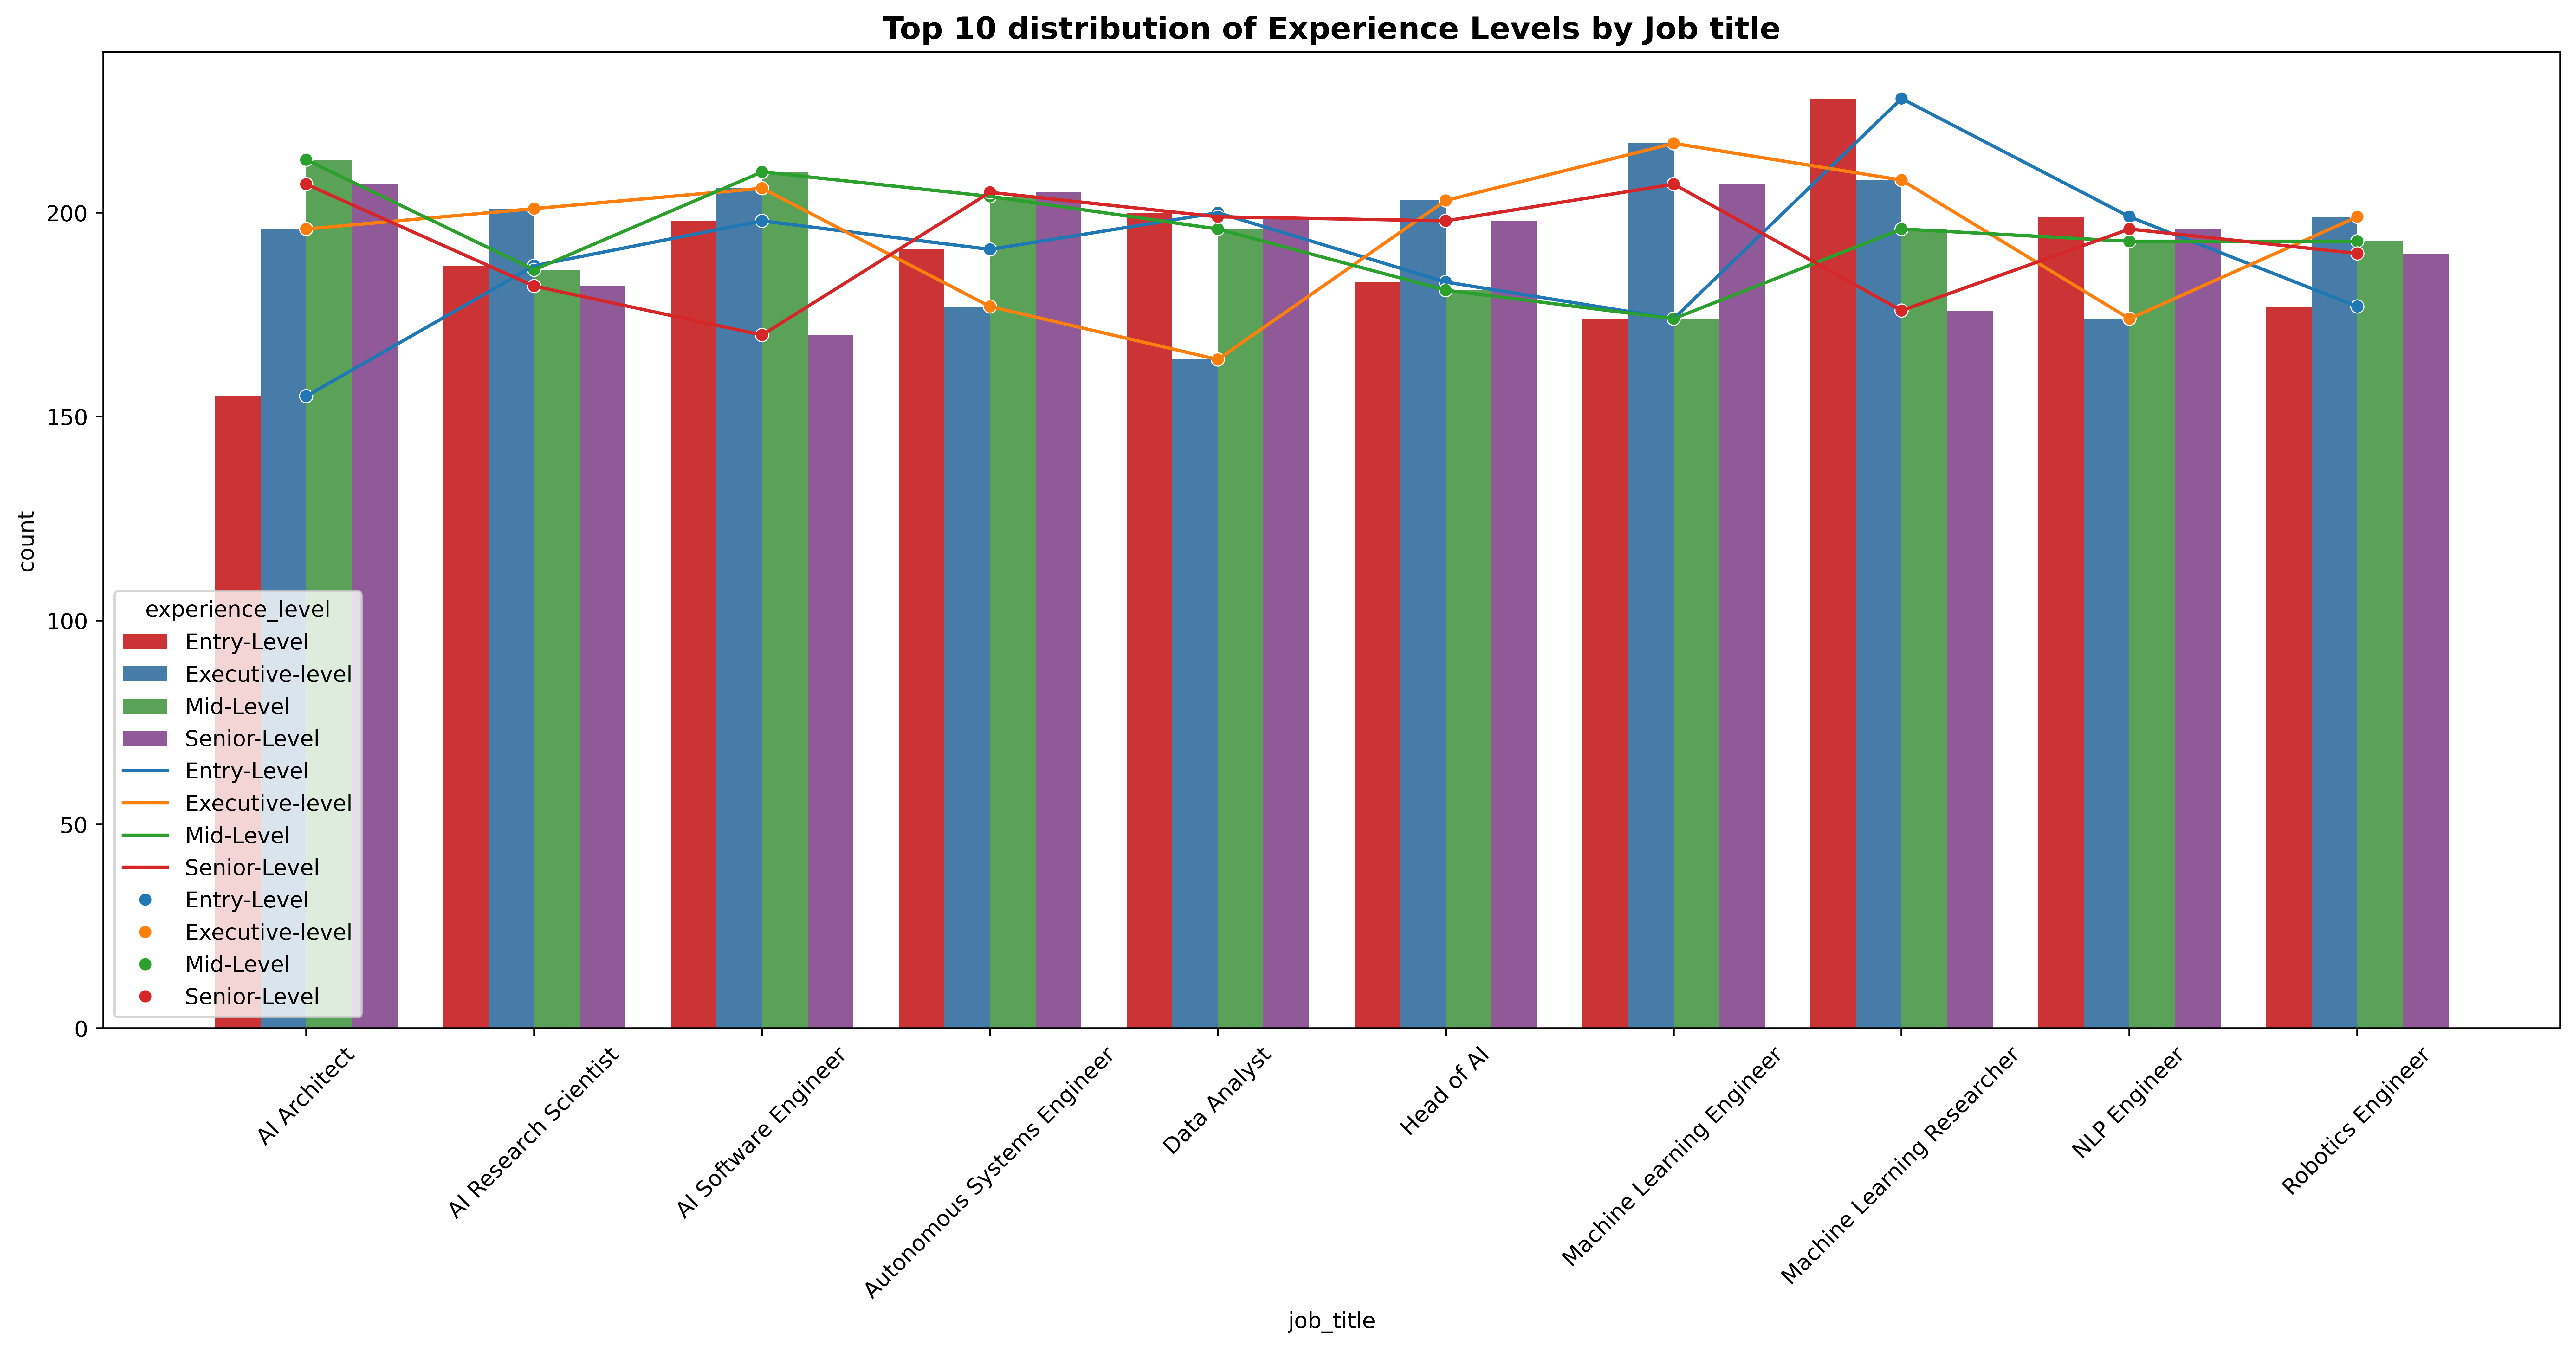

In [44]:
plt.figure(figsize=(20,8) , dpi = 500)
sns.barplot(data = grouped , x = 'job_title',y= 'count',hue= 'experience_level',palette='Set1')
sns.lineplot(data = grouped , x = 'job_title',y= 'count',hue= 'experience_level')
sns.scatterplot(data = grouped , x = 'job_title',y= 'count',hue= 'experience_level')
plt.xticks(rotation = 45)
plt.title(" Top 10 distribution of Experience Levels by Job title " , fontsize = 14 , fontweight = 'bold')
plt.show()

Which employment type(full-time,part-time,contract,Freelancer) is most common in AI job posting ???

In [45]:
ai_job['employment_type'].unique()

array(['CT', 'FL', 'PT', 'FT'], dtype=object)

In [46]:
def employee_type(type):
    if type == 'CT':
        return 'Contract'
    if type == 'PT':
        return 'Part-Time'
    if type == 'FT':
        return 'Full-Time'
    else:
        return 'Freelance'

In [47]:
ai_job['employment_type'] = ai_job['employment_type'].apply(employee_type)

In [48]:
ai_job['employment_type'].value_counts()

employment_type
Full-Time    3812
Freelance    3758
Contract     3721
Part-Time    3709
Name: count, dtype: int64

In [49]:
ai_job['job_title'].unique()

array(['AI Research Scientist', 'AI Software Engineer', 'AI Specialist',
       'NLP Engineer', 'AI Consultant', 'AI Architect',
       'Principal Data Scientist', 'Data Analyst',
       'Autonomous Systems Engineer', 'AI Product Manager',
       'Machine Learning Engineer', 'Data Engineer', 'Research Scientist',
       'ML Ops Engineer', 'Robotics Engineer', 'Head of AI',
       'Deep Learning Engineer', 'Data Scientist',
       'Machine Learning Researcher', 'Computer Vision Engineer'],
      dtype=object)

Let,s filter out the Ai jobs in job_title 

In [50]:
ai_job_filtered = ai_job[ai_job['job_title'].str.contains('AI',case=False,na=False)]
print(ai_job_filtered['job_title'])

0        AI Research Scientist
1         AI Software Engineer
2                AI Specialist
4                AI Consultant
5                 AI Architect
                 ...          
14981       AI Product Manager
14983             AI Architect
14985             AI Architect
14987    AI Research Scientist
14998               Head of AI
Name: job_title, Length: 5251, dtype: object


let,s groupby the ai_job_filtered and employee type

In [51]:
group = ai_job_filtered.groupby(['job_title','employment_type']).size().reset_index(name='count')
group

job_title employment_type  count
0            AI Architect        Contract    175
1            AI Architect       Freelance    177
2            AI Architect       Full-Time    222
3            AI Architect       Part-Time    197
4           AI Consultant        Contract    180
5           AI Consultant       Freelance    184
6           AI Consultant       Full-Time    167
7           AI Consultant       Part-Time    173
8      AI Product Manager        Contract    182
9      AI Product Manager       Freelance    181
10     AI Product Manager       Full-Time    193
11     AI Product Manager       Part-Time    187
12  AI Research Scientist        Contract    191
13  AI Research Scientist       Freelance    197
14  AI Research Scientist       Full-Time    189
15  AI Research Scientist       Part-Time    179
16   AI Software Engineer        Contract    189
17   AI Software Engineer       Freelance    206
18   AI Software Engineer       Full-Time    204
19   AI Software Engineer       Part-Time    185
20          AI Specialist        Contract    171
21          AI Specialist       Freelance    197
22          AI Specialist       Full-Time    176
23          AI Specialist       Part-Time    184
24             Head of AI        Contract    192
25             Head of AI       Freelance    196
26             Head of AI       Full-Time    184
27             Head of AI       Part-Time    193

let,s visualize the data 

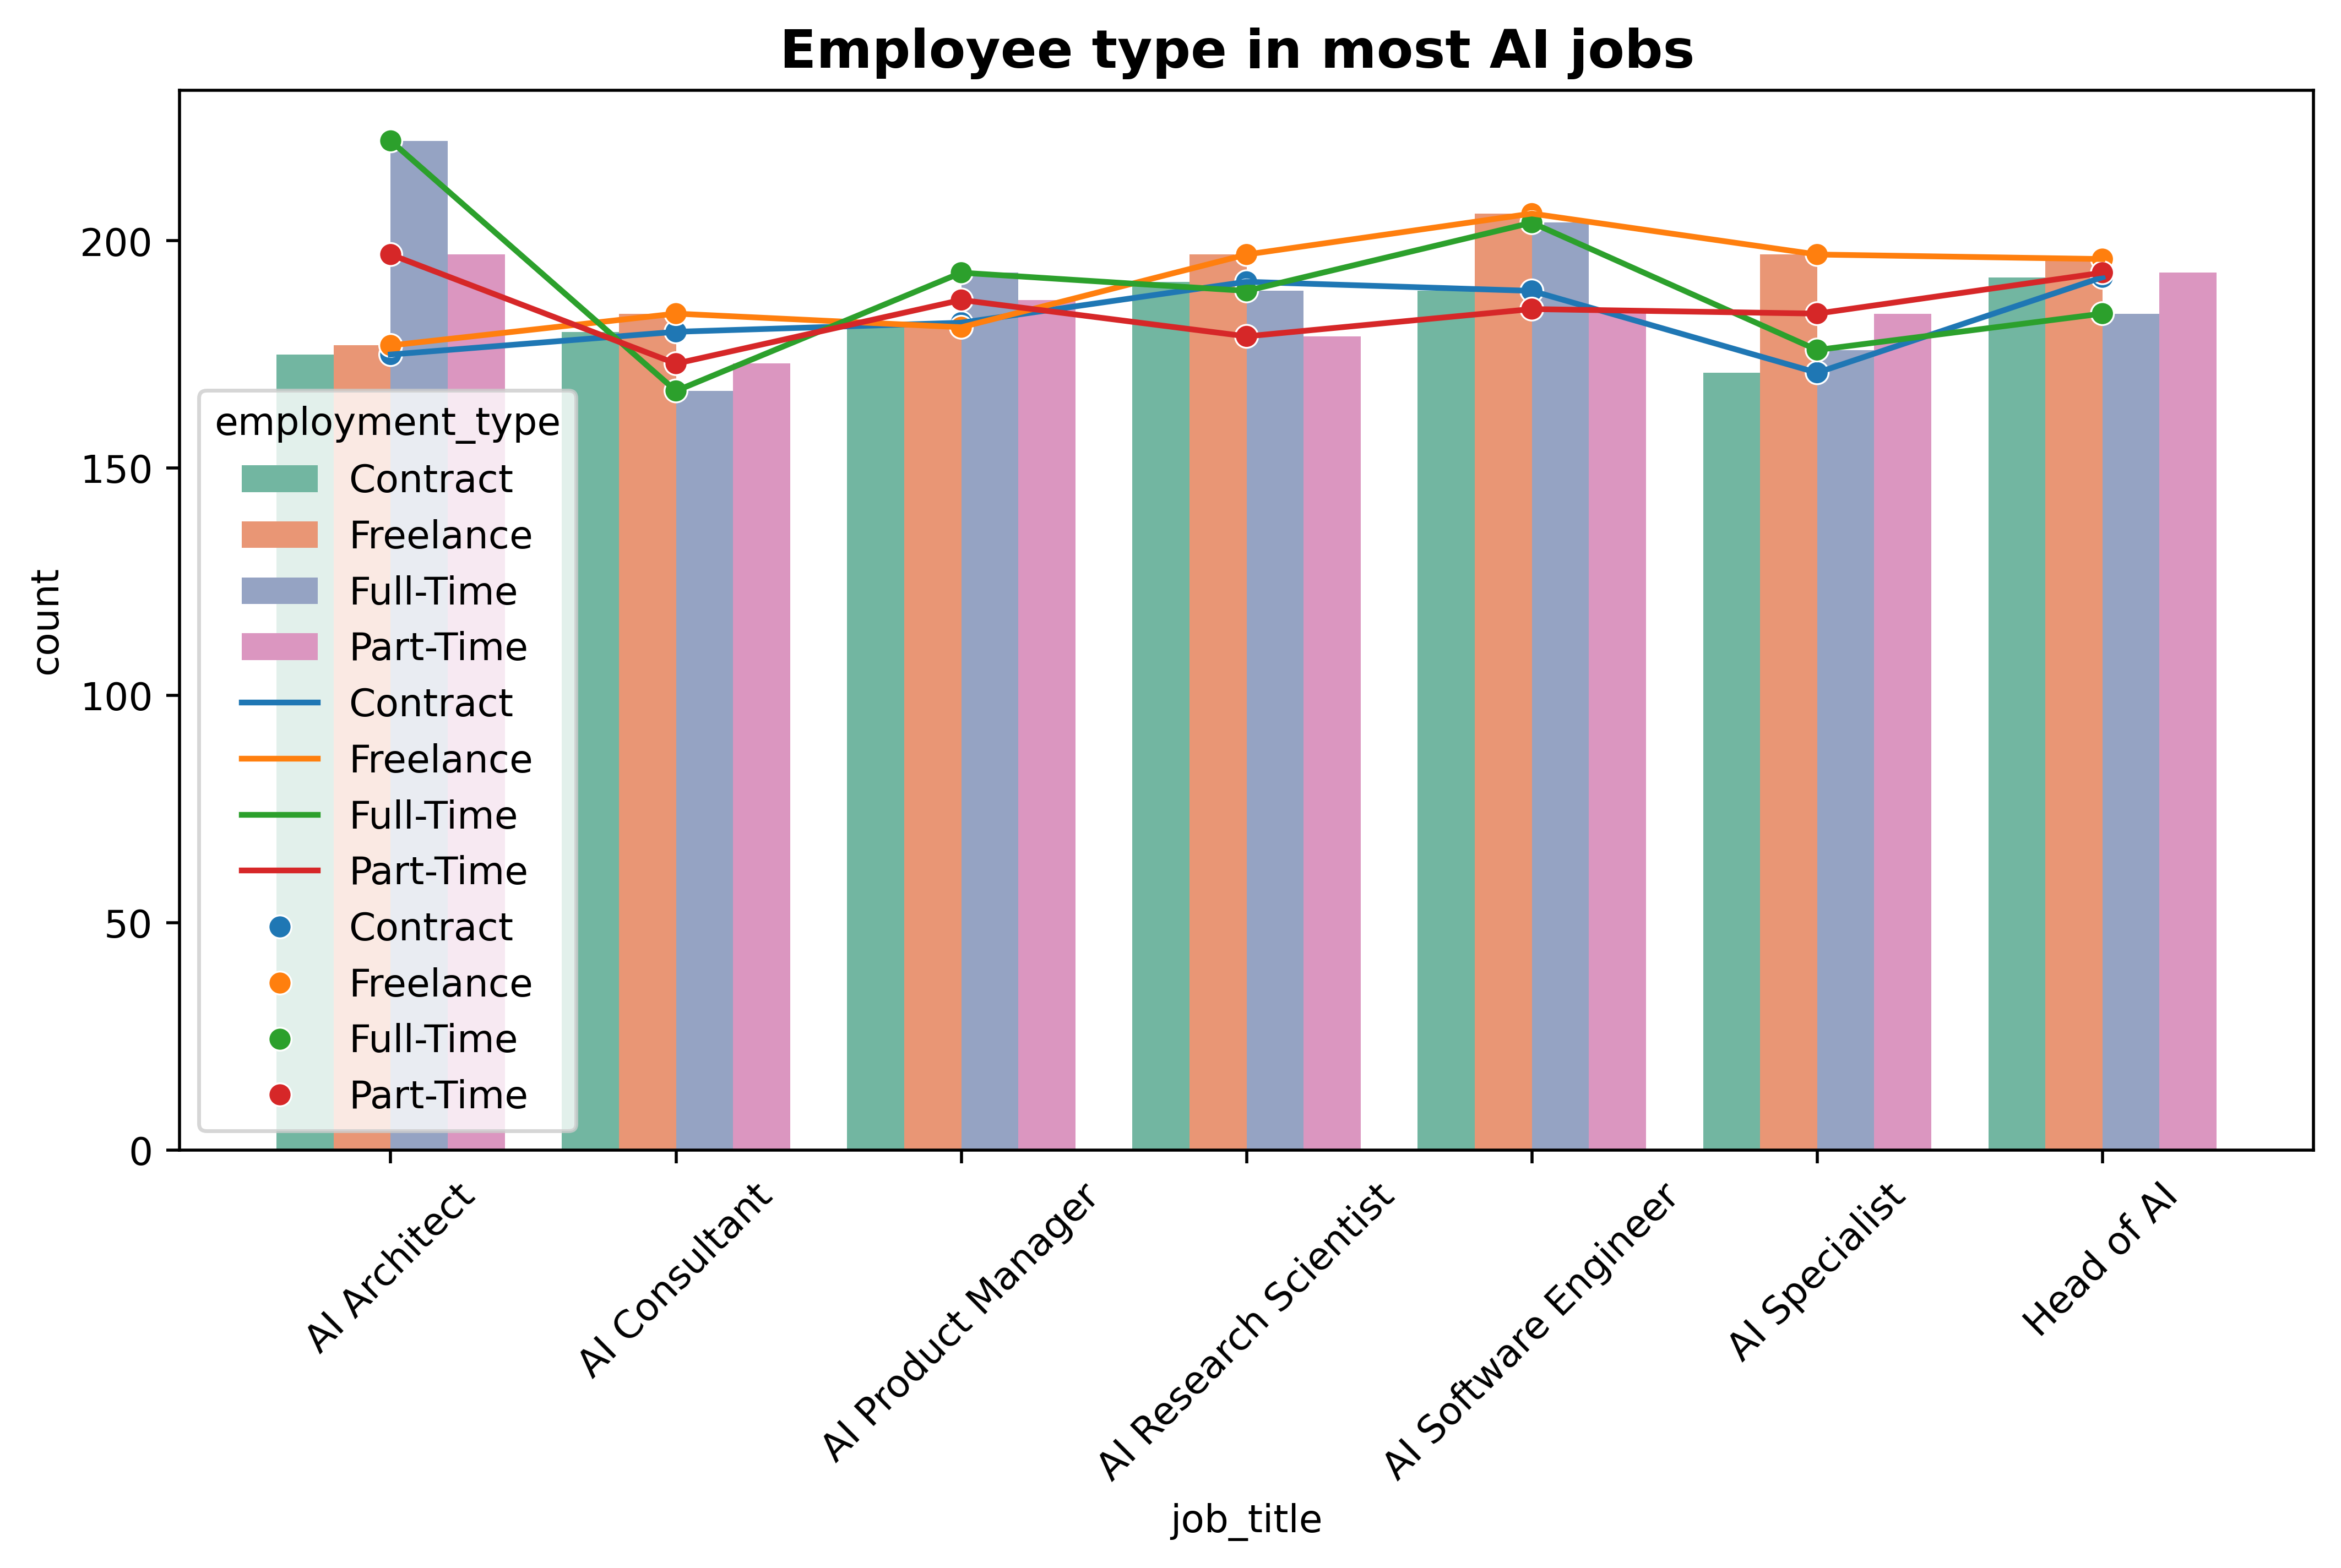

In [52]:
plt.figure(figsize=(10,5) , dpi = 500)
sns.barplot(data = group , x= 'job_title', y = 'count' , hue= 'employment_type' , palette='Set2')
sns.lineplot(data = group , x= 'job_title', y = 'count' , hue= 'employment_type')
sns.scatterplot(data = group , x= 'job_title', y = 'count' , hue= 'employment_type')
plt.title("Employee type in most AI jobs " , fontsize = 14 , fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()

3. What are the top 10 countries or regions where AI jobs are posted (based on the company location)

In [53]:
top_countries = (ai_job['company_location'].value_counts().head(10).reset_index())

In [54]:
top_countries

company_location  count
0          Germany    814
1          Denmark    778
2           Canada    769
3           France    769
4          Austria    765
5        Singapore    764
6            China    763
7            India    754
8           Sweden    752
9           Israel    751

C:\Users\ragha\AppData\Local\Temp\ipykernel_19676\1093573614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_countries , x = 'company_location',y = 'count' , palette='crest' )


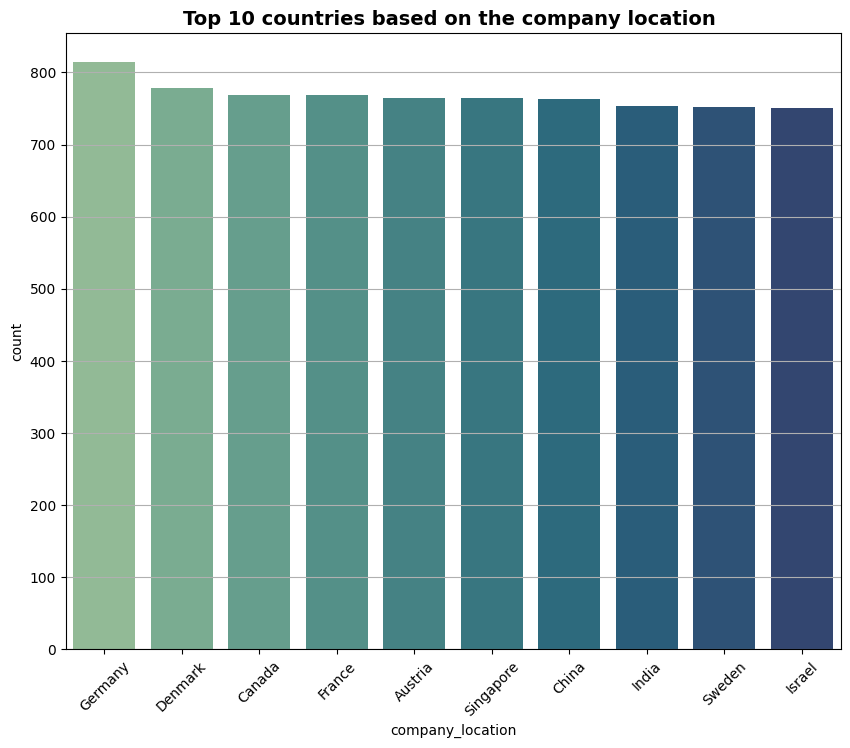

In [55]:
plt.figure(figsize=(10,8))
sns.barplot(data = top_countries , x = 'company_location',y = 'count' , palette='crest' )
plt.grid(axis= 'y' , which= 'both' )
plt.xticks(rotation = 45)
plt.title("Top 10 countries based on the company location " , fontsize = 14 , fontweight = 'bold')
plt.show()


4. Which company size(small , medium , larger) are posting the most jobs 


In [56]:
ai_job['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

In [57]:
def company_size(size):
    if size == 'L':
        return 'Large'
    if size == 'M':
        return 'Medium'
    else:
        return 'Small'

In [58]:
ai_job['company_size'] = ai_job['company_size'].apply(company_size)

In [59]:
posting  = ai_job['company_size'].value_counts()

df = pd.DataFrame(posting)
type(df)



pandas.core.frame.DataFrame

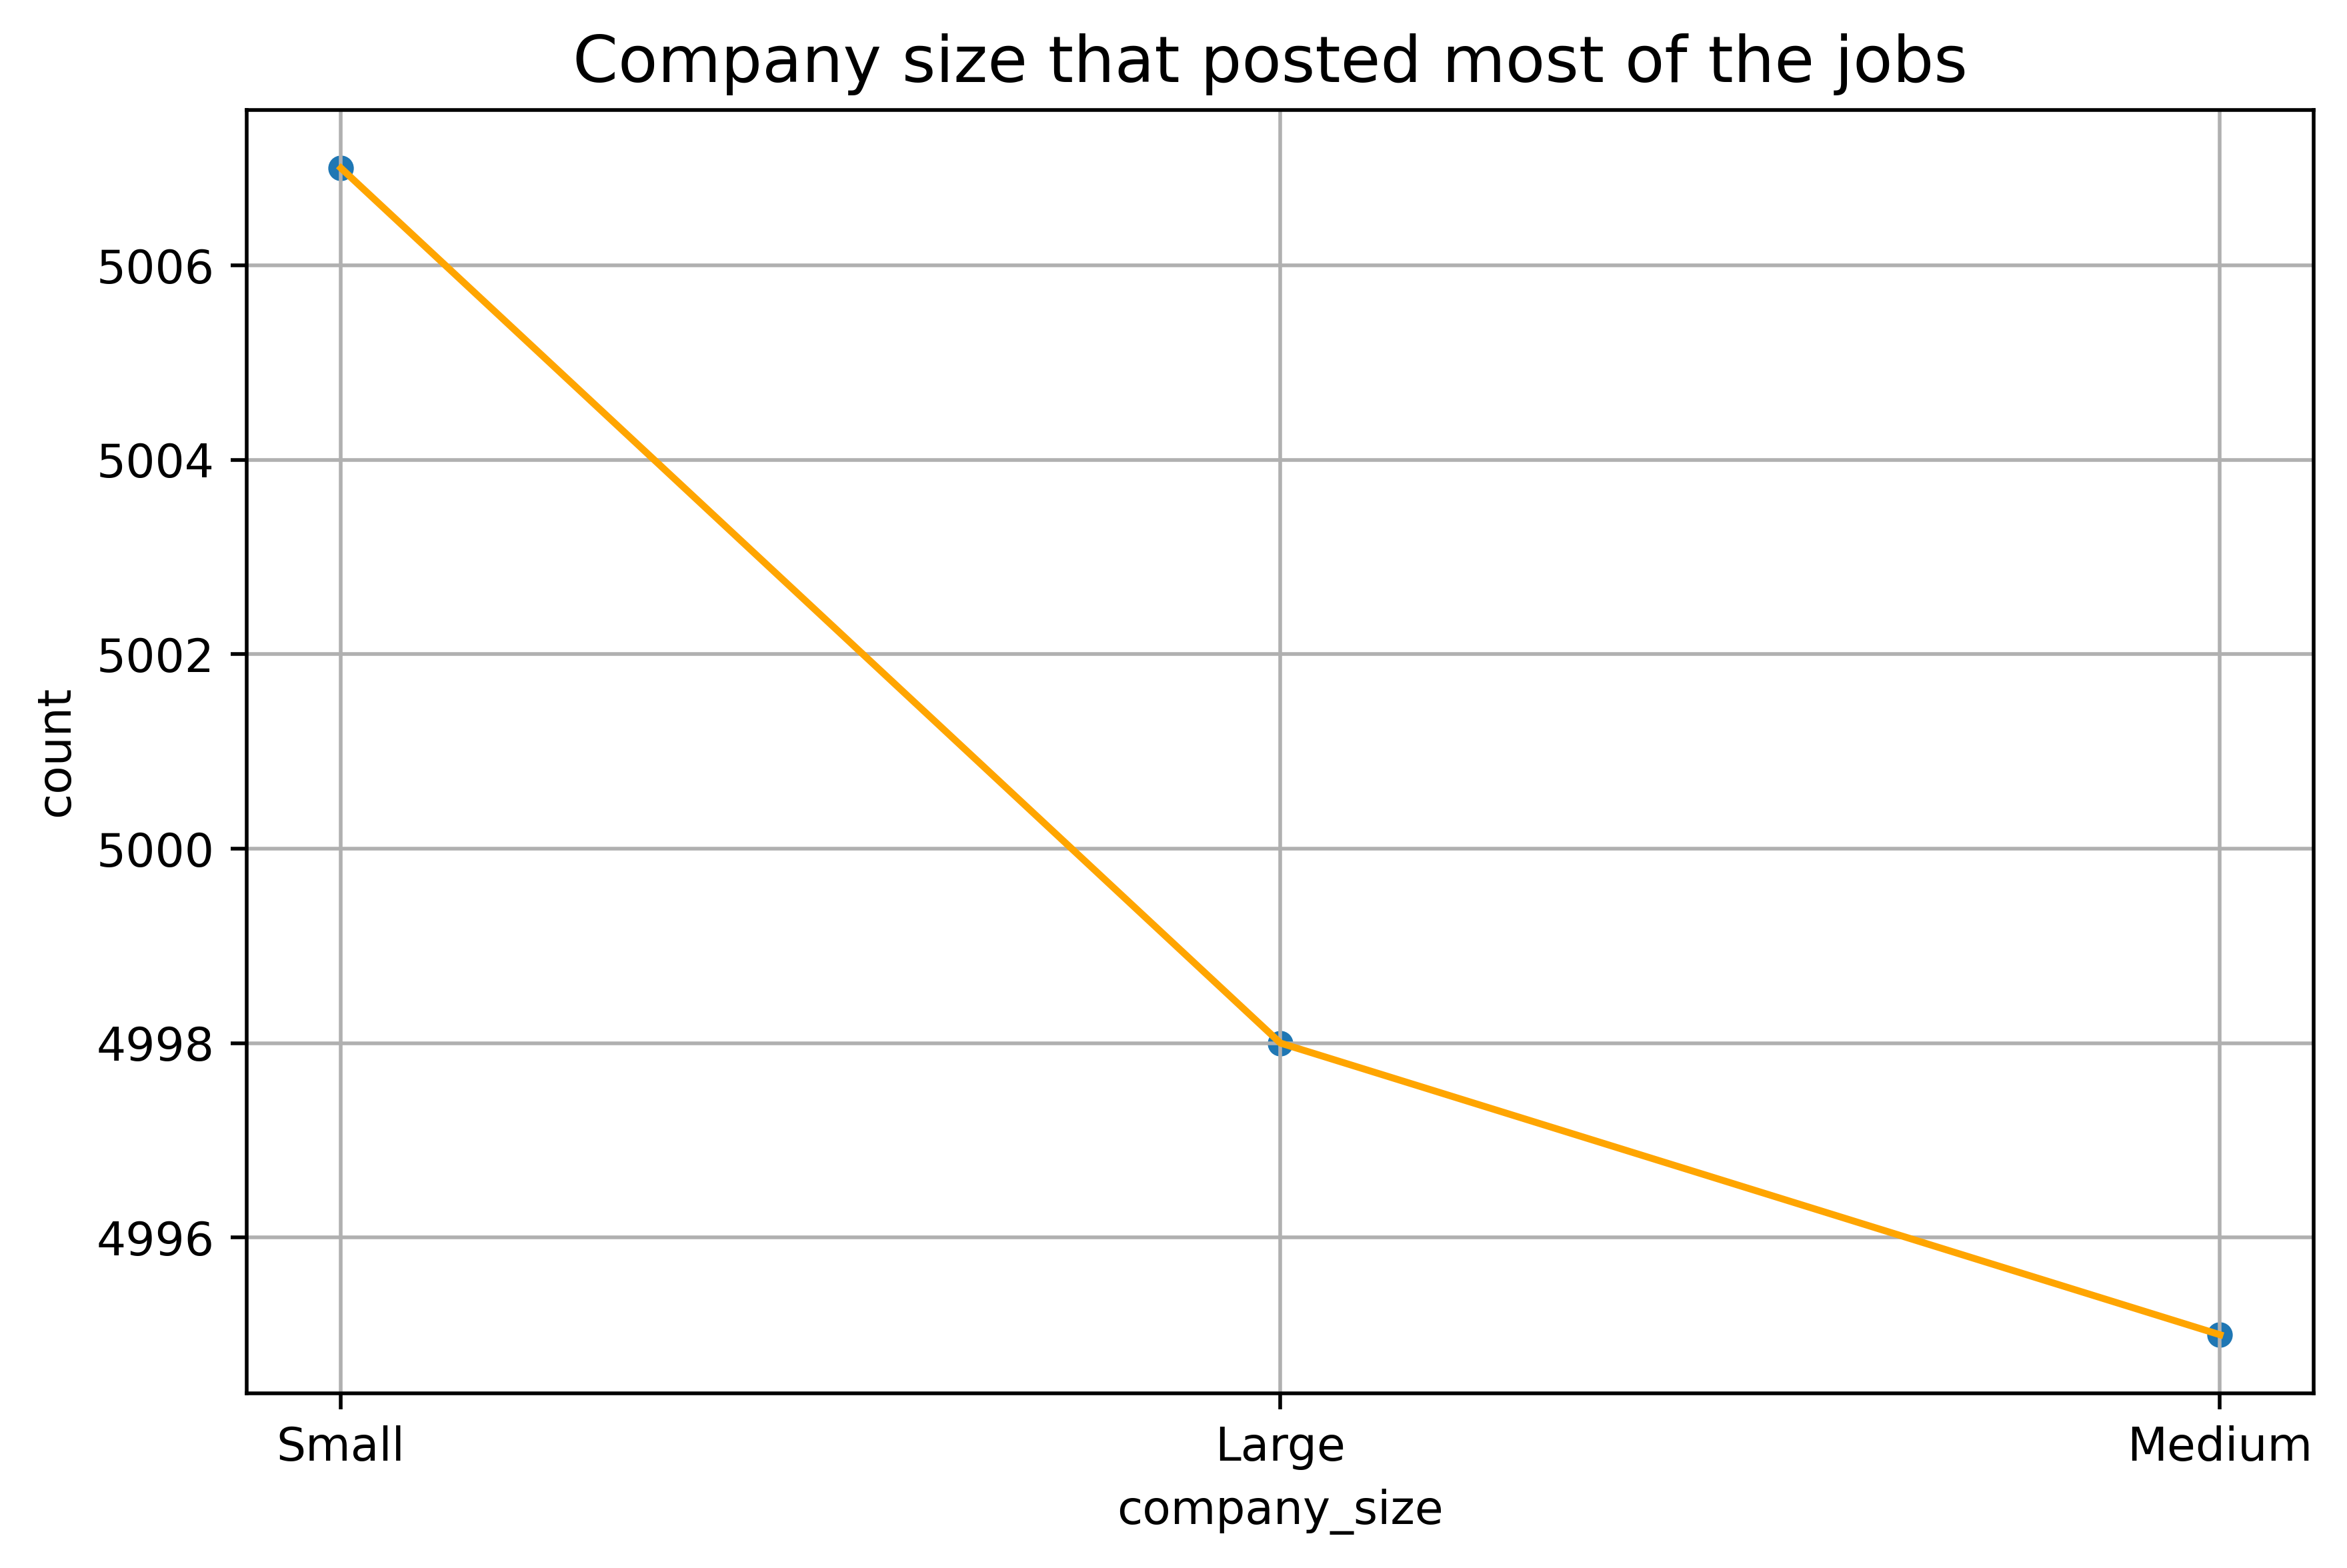

In [60]:

plt.figure(figsize=(8,5),dpi = 500)
sns.lineplot(data= df  , x = 'company_size',  y= 'count' ,color = 'orange')
sns.scatterplot(data=df  , x = 'company_size',  y= 'count')
plt.title("Company size that posted most of the jobs " , fontsize = 14 )
plt.grid()


5. What is the average remote ratio across companies ? Are jobs more remote or onsite 

In [61]:
ai_job['remote_ratio'].unique()

array([ 50, 100,   0])

In [62]:
def remote_jobs(job):
    if job == 0:
        return 'On-site'
    if job == 50:
        return 'Hybrid'
    else :
        return 'Remote'

In [63]:
ai_job['remote_ratio_numeric'] = ai_job['remote_ratio'].apply(remote_jobs)

In [64]:
ai_job['remote_ratio_numeric'].unique()

array(['Hybrid', 'Remote', 'On-site'], dtype=object)

In [65]:
average_remote_ratio  = ai_job.groupby('company_name')['remote_ratio'].mean().reset_index()

In [66]:
average_remote_ratio

company_name  remote_ratio
0               AI Innovations     48.807054
1            Advanced Robotics     48.000000
2        Algorithmic Solutions     48.870056
3              Autonomous Tech     49.346405
4           Cloud AI Solutions     50.105152
5          Cognitive Computing     49.228395
6               DataVision Ltd     47.909791
7            DeepTech Ventures     48.996656
8   Digital Transformation LLC     49.791883
9               Future Systems     50.989583
10  Machine Intelligence Group     48.644252
11          Neural Networks Co     51.355748
12          Predictive Systems     48.944034
13       Quantum Computing Inc     51.145833
14             Smart Analytics     50.701187
15                TechCorp Inc     48.775510

In [67]:
top_10 =  average_remote_ratio.sort_values(by= 'remote_ratio',ascending=False).head(10)

In [1]:
plt.figure(figsize=(10,8),dpi = 500)
ax  = sns.barplot(data=top_10,x= 'company_name' , y = 'remote_ratio' , palette='rainbow')
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f',label_type='edge',padding=5 , fontweight = 'bold')
    
plt.title("Top 10 companies with highest average remote ratio", fontsize = 14 , fontweight = 'bold')
plt.xticks(rotation = 45)


NameError: name 'plt' is not defined

Are jobs more remote or onsite 


In [69]:
remote_or_onsite = ai_job['remote_ratio_numeric'].value_counts()

In [70]:
df= pd.DataFrame(remote_or_onsite)
type(df)
df

count
remote_ratio_numeric       
On-site                5075
Hybrid                 5005
Remote                 4920

C:\Users\ragha\AppData\Local\Temp\ipykernel_19676\3129981725.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x = sns.barplot(data = df , x = 'remote_ratio_numeric', y = 'count' ,palette='Set3' )


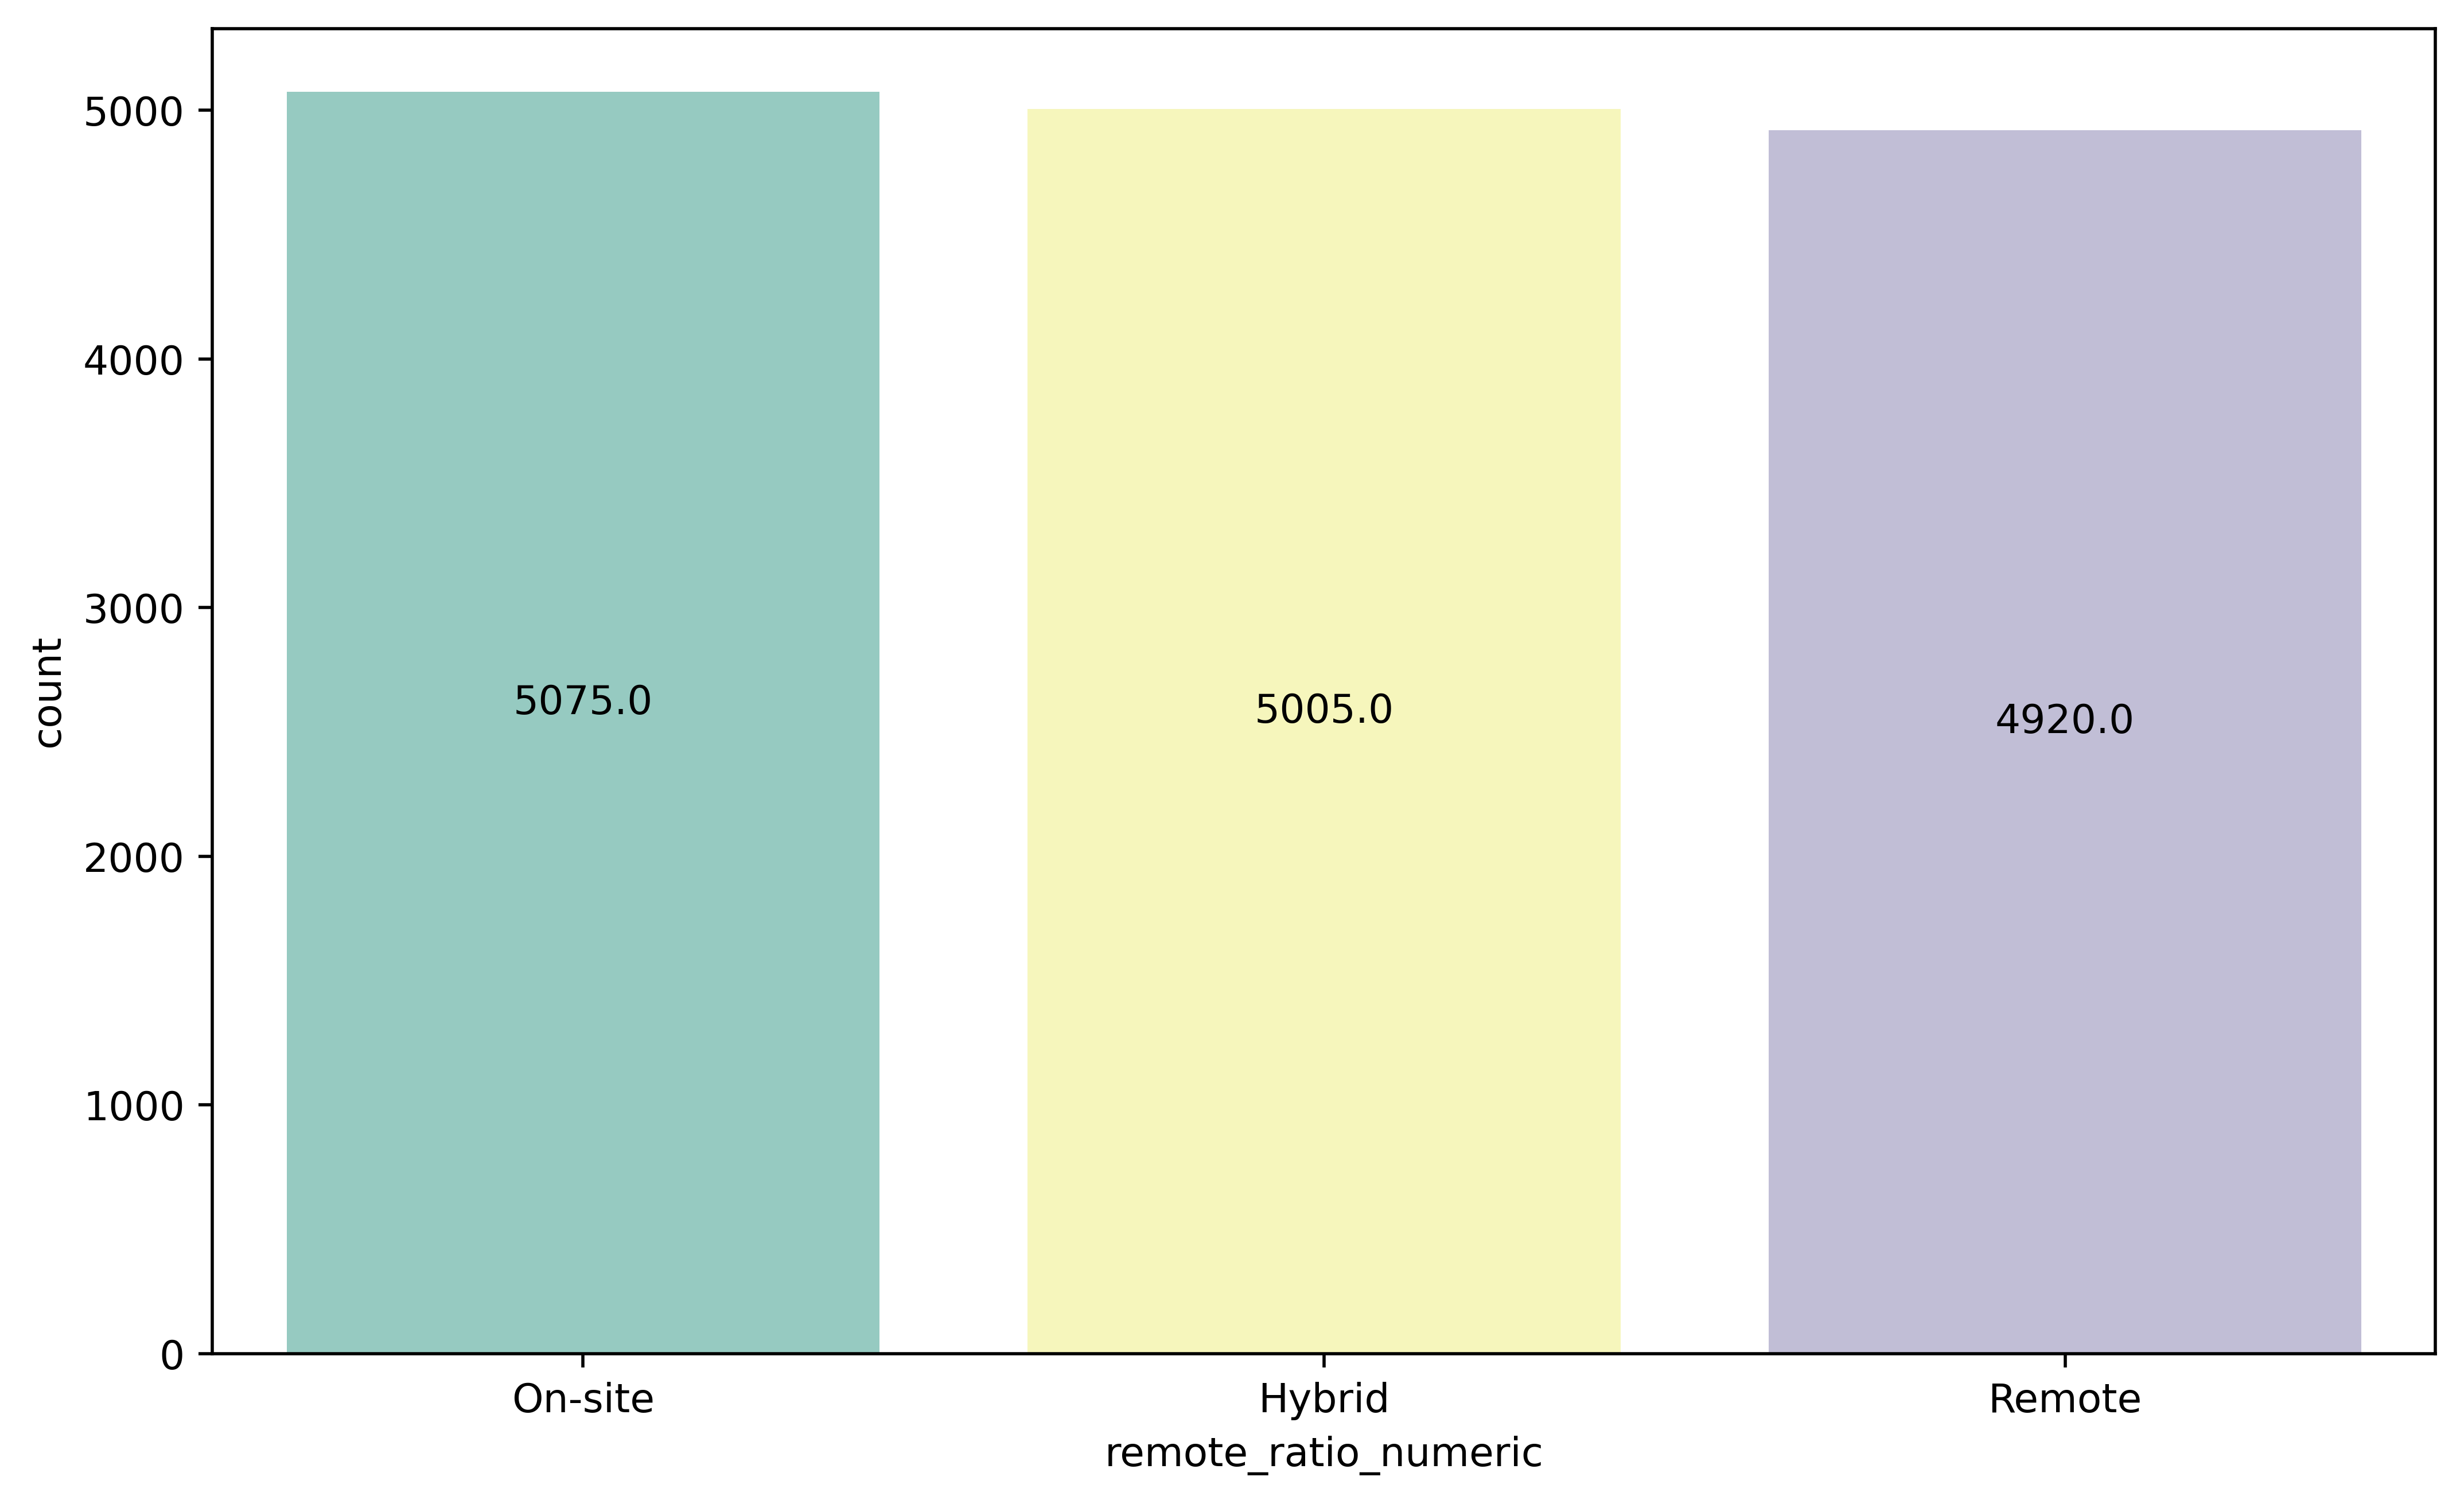

In [71]:
plt.figure(figsize=(10,6) , dpi = 500)
x = sns.barplot(data = df , x = 'remote_ratio_numeric', y = 'count' ,palette='Set3' ) 
for i in x.containers:
        x.bar_label(i,fmt='%.1f',label_type='center',padding=5)

jobs are more in on-site as compare to remote

# 6. Which are the most common employee residences 

In [72]:
ai_job['employee_residence'].value_counts()

employee_residence
Sweden            790
France            781
Denmark           777
Austria           776
India             772
Germany           769
South Korea       763
Canada            762
China             761
Netherlands       758
United Kingdom    750
Switzerland       748
Ireland           740
Singapore         740
Israel            731
Australia         730
Norway            726
United States     716
Finland           710
Japan             700
Name: count, dtype: int64

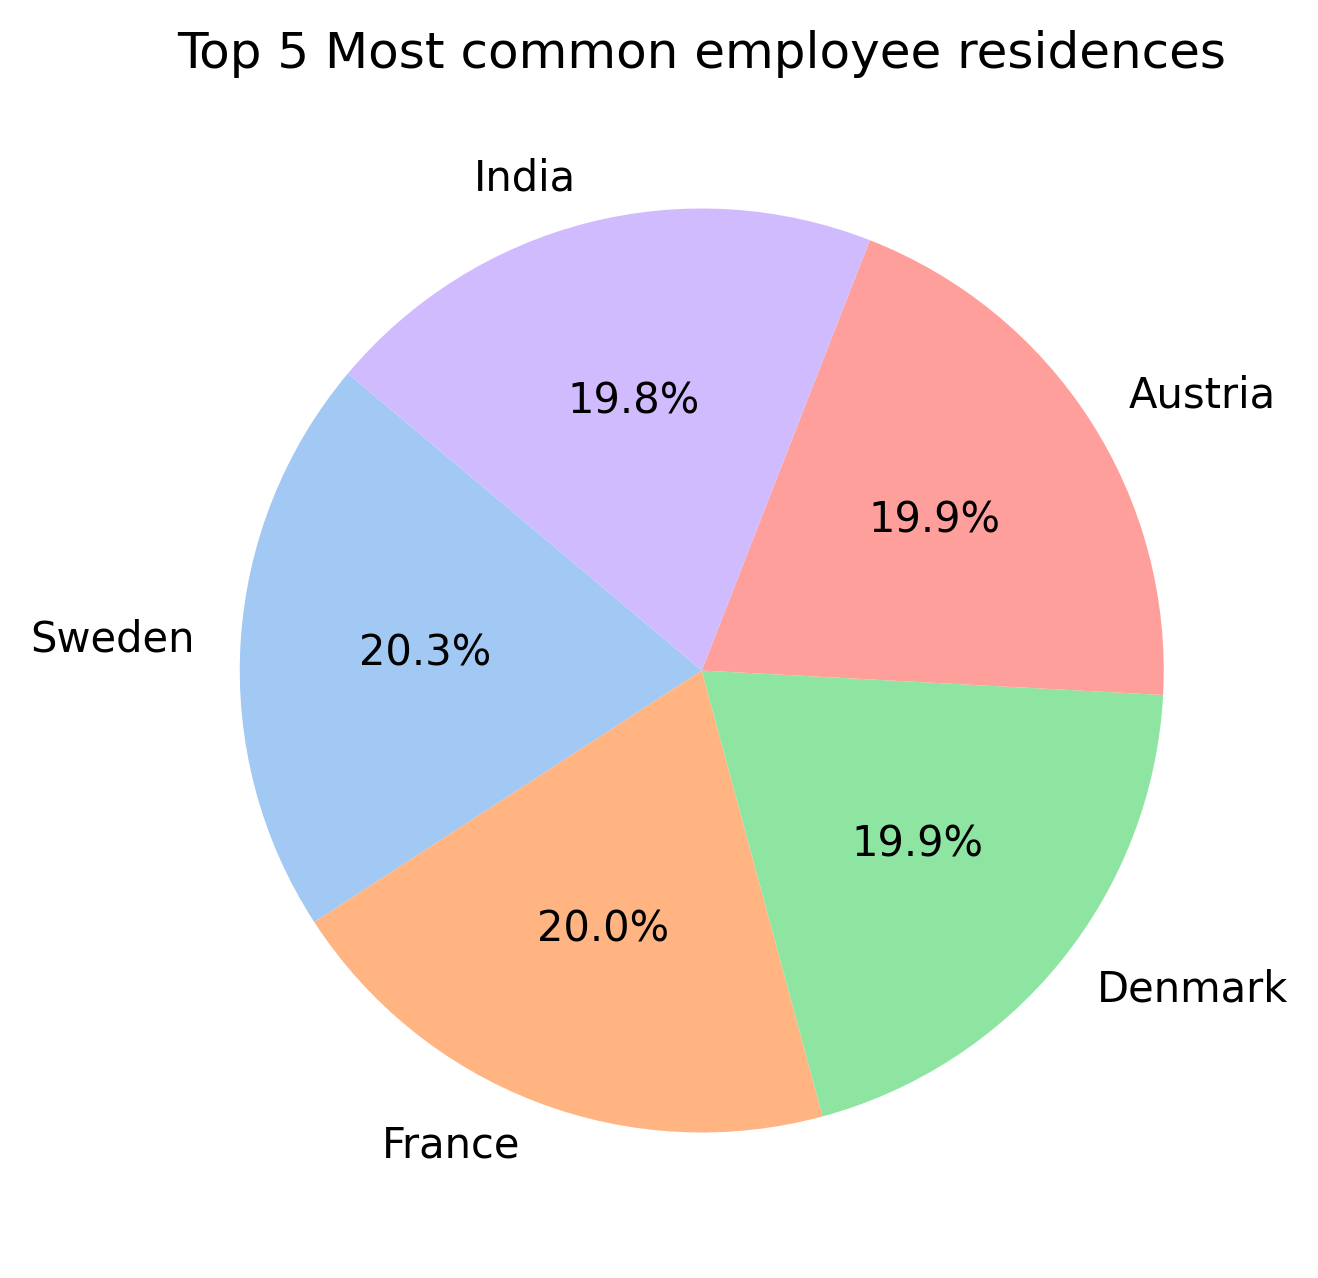

In [73]:
top5 = ai_job['employee_residence'].value_counts().head(5)
plt.figure(figsize=(10,5) , dpi = 300)
plt.pie(top5 , labels=top5.index , autopct='%1.1f%%',startangle=140 , colors = sns.color_palette('pastel'))
plt.title('Top 5 Most common employee residences')

plt.show()

#  7. How has the number of jobs posting changed over time (using post date) ? 

In [74]:
ai_job['posting_date'].value_counts()

posting_date
2024-07-05    51
2024-04-08    51
2024-08-25    49
2025-04-05    46
2024-03-01    44
              ..
2025-03-24    19
2025-03-12    18
2024-02-10    18
2024-09-15    15
2024-12-19    14
Name: count, Length: 486, dtype: int64

Grouping by the month 

In [75]:
jobs_by_month = ai_job.groupby(ai_job['posting_date'].dt.to_period('M')).size()

In [76]:
jobs_by_month 

posting_date
2024-01    953
2024-02    927
2024-03    932
2024-04    985
2024-05    955
2024-06    938
2024-07    959
2024-08    958
2024-09    895
2024-10    949
2024-11    922
2024-12    959
2025-01    964
2025-02    840
2025-03    922
2025-04    942
Freq: M, dtype: int64

In [77]:
jobs_by_month.index  = jobs_by_month.index.to_timestamp()

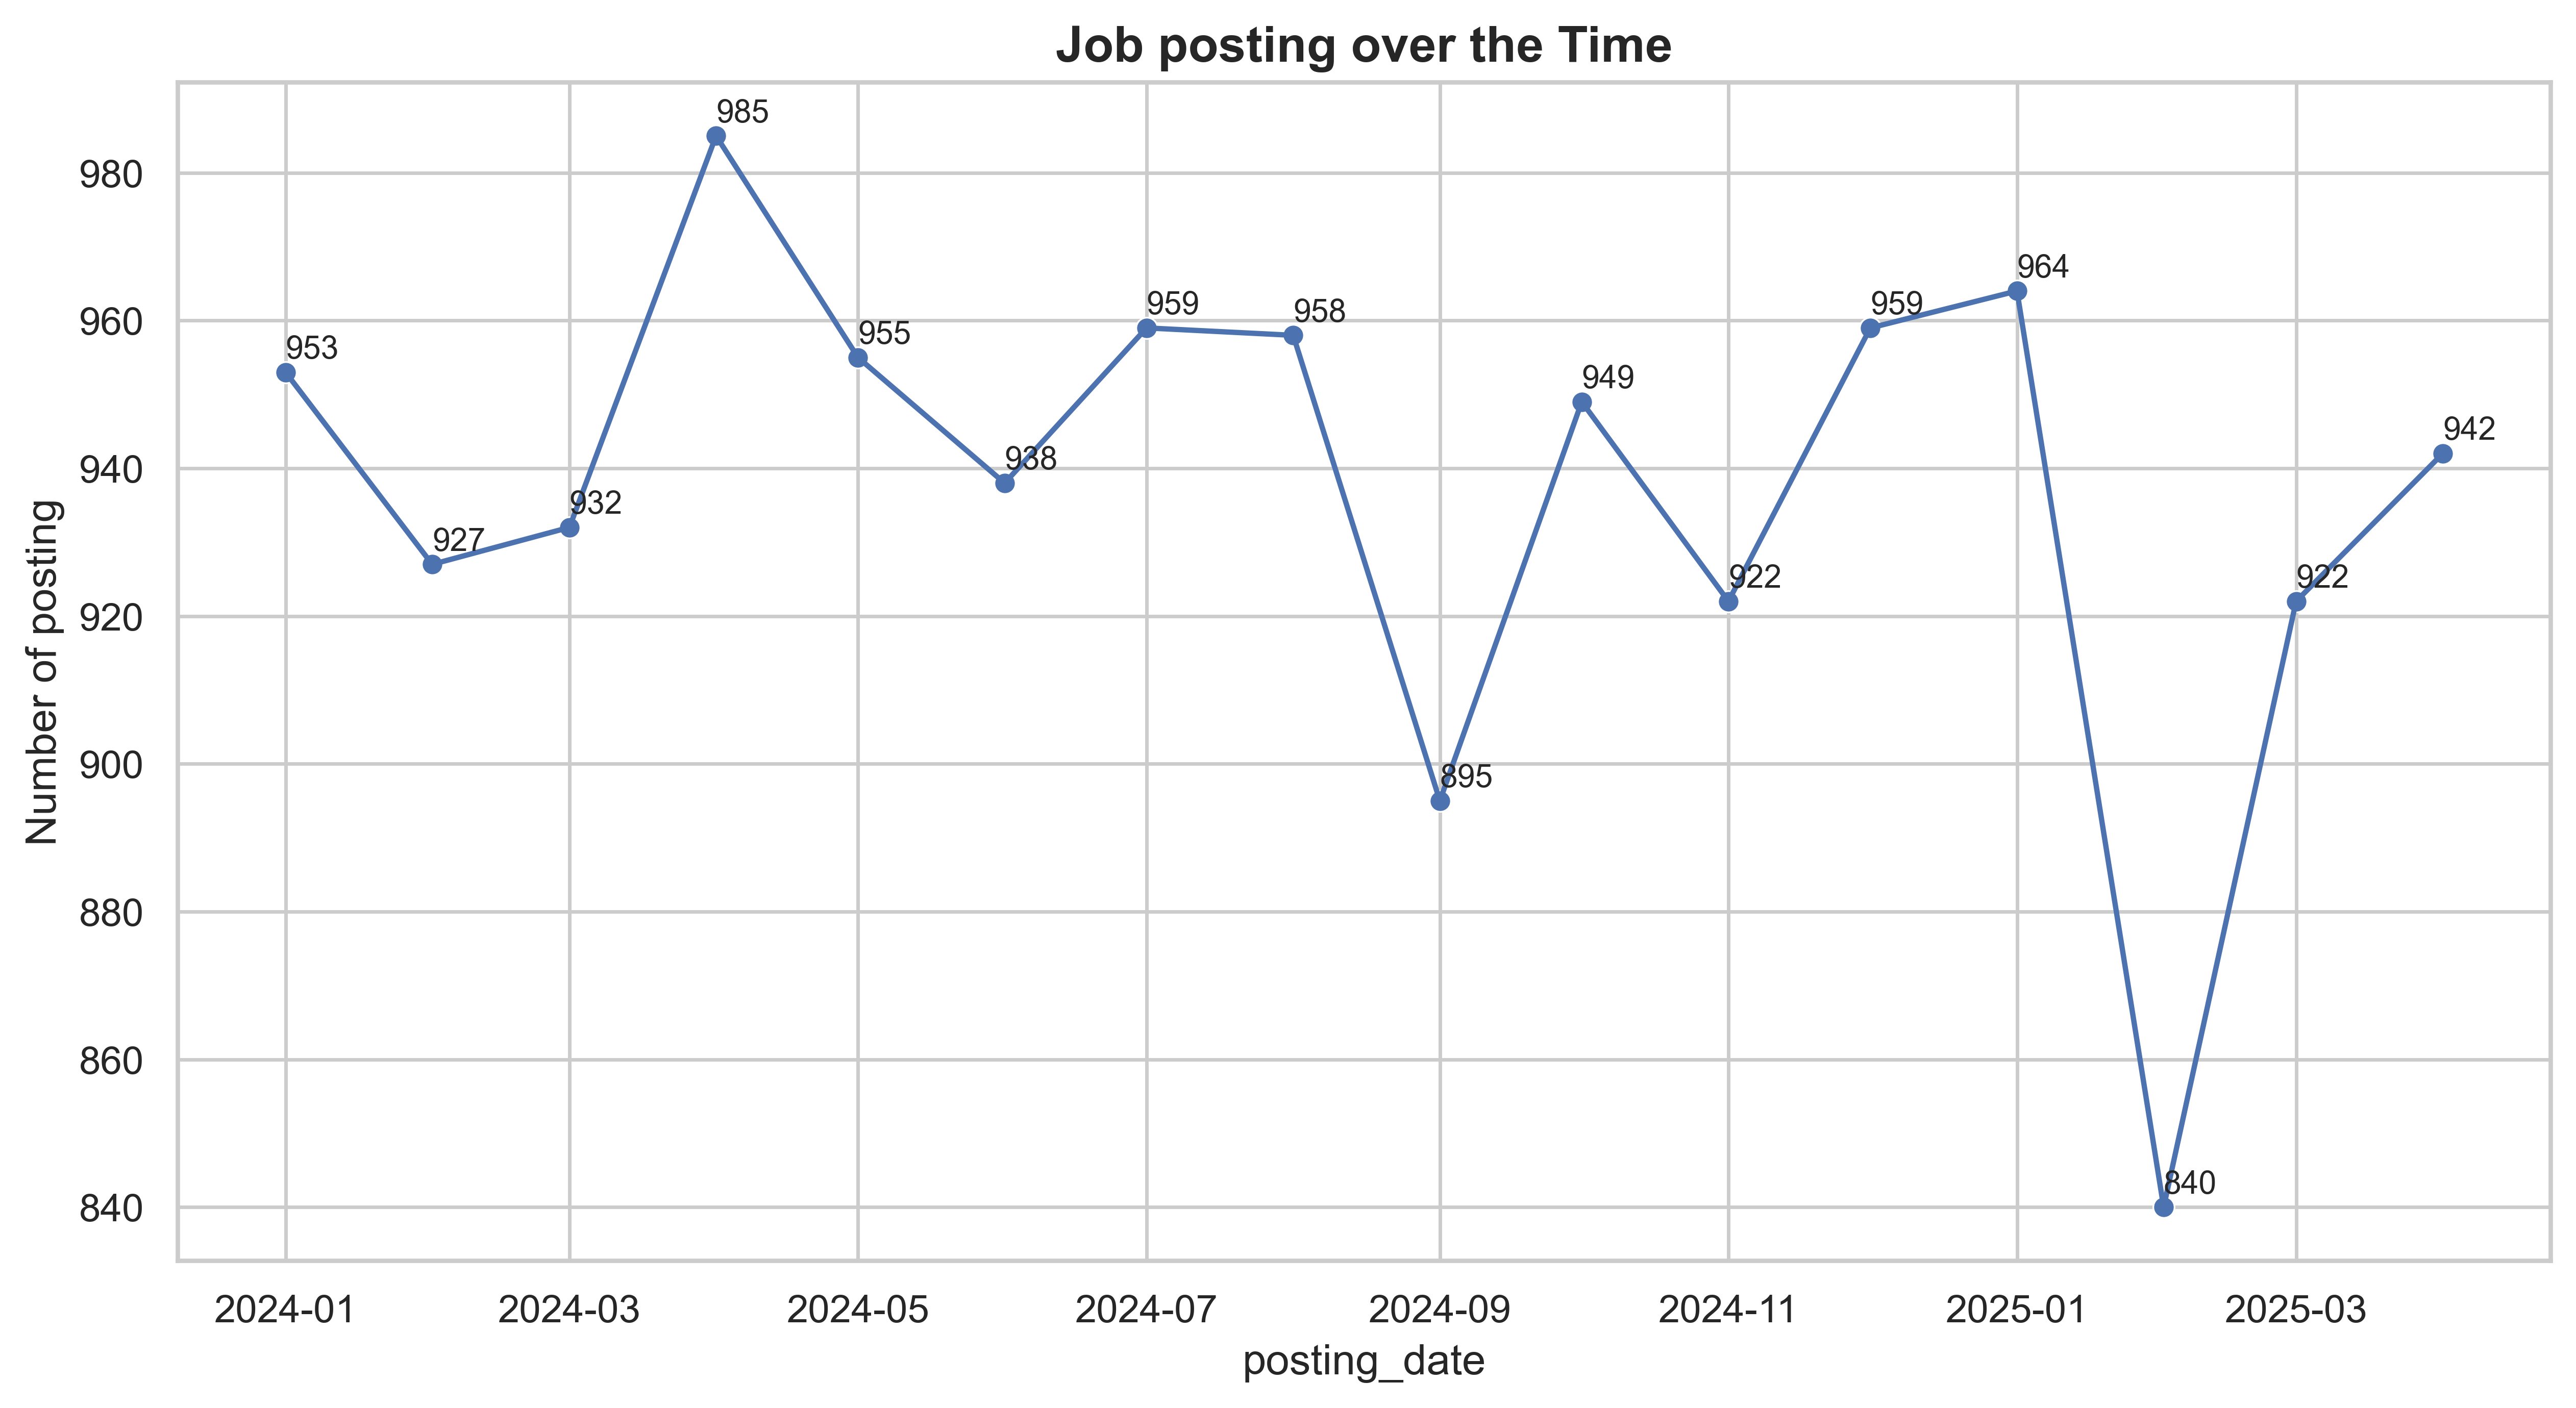

In [78]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(12,6),dpi = 500)
ax = sns.lineplot(x = jobs_by_month.index , y = jobs_by_month.values , markers='o')
for x , y in zip(jobs_by_month.index , jobs_by_month.values):
    plt.text(x, y + 1 ,str(y), ha= 'left' , va = 'bottom' ,fontsize = 9 )
sns.scatterplot(x = jobs_by_month.index , y = jobs_by_month.values )
plt.title("Job posting over the Time" , fontsize = 14 , fontweight = 'bold')
plt.ylabel('Number of posting')
plt.show()

# 8. What is the average time between post date and application deadline across different companies 

In [79]:
ai_job['difference_application_post_dates'] = (ai_job['application_deadline'] - ai_job['posting_date']).dt.days
ai_job['difference_application_post_dates']

0        20
1        52
2        20
3        63
4        69
         ..
14995    47
14996    14
14997    44
14998    32
14999    23
Name: difference_application_post_dates, Length: 15000, dtype: int64

In [80]:
group_by_company = ai_job.groupby('company_name')['difference_application_post_dates'].mean().reset_index().head(10)

In [81]:
group_by_company

company_name  difference_application_post_dates
0              AI Innovations                          43.696058
1           Advanced Robotics                          43.837838
2       Algorithmic Solutions                          43.158192
3             Autonomous Tech                          44.040305
4          Cloud AI Solutions                          42.152471
5         Cognitive Computing                          43.733539
6              DataVision Ltd                          44.246425
7           DeepTech Ventures                          42.294314
8  Digital Transformation LLC                          44.100937
9              Future Systems                          43.198958

C:\Users\ragha\AppData\Local\Temp\ipykernel_19676\1976253427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = group_by_company , x = 'company_name' , y = 'difference_application_post_dates' , palette='Set2')


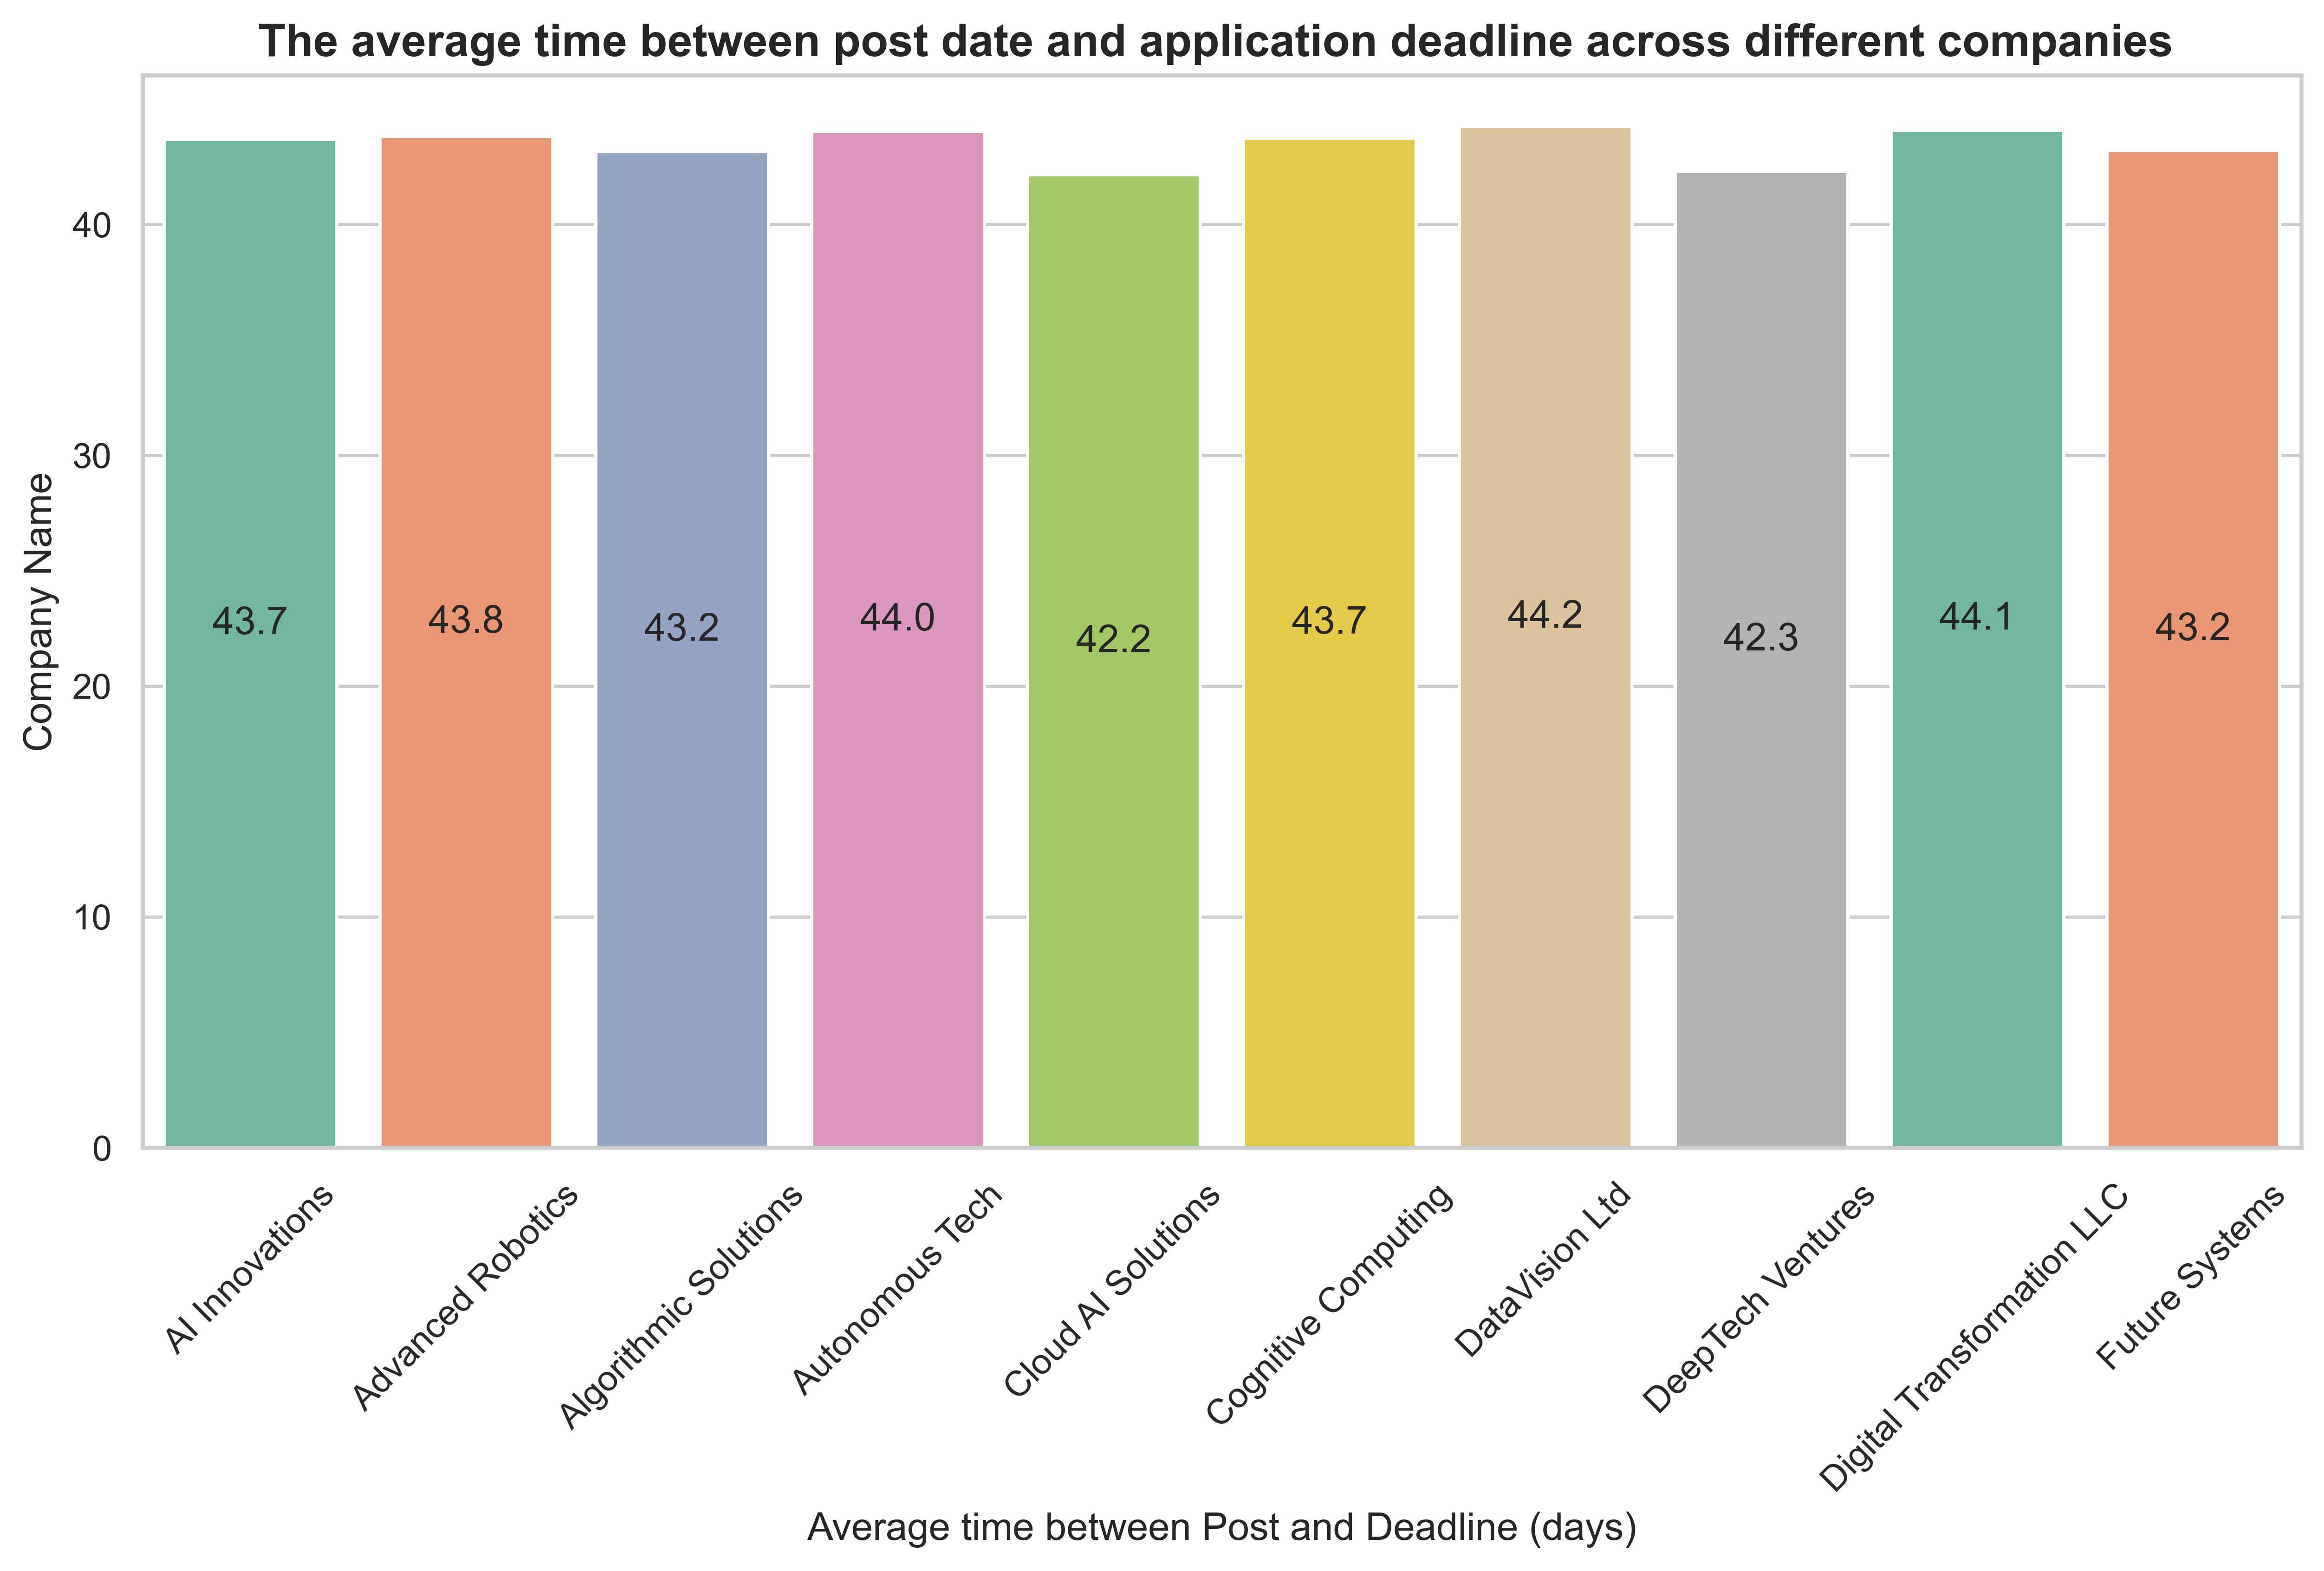

In [82]:
plt.figure(figsize = (12 , 6) , dpi = 500)
ax = sns.barplot(data = group_by_company , x = 'company_name' , y = 'difference_application_post_dates' , palette='Set2')
plt.title("The average time between post date and application deadline across different companies " , fontsize = 14 , fontweight = 'bold' )
plt.xlabel("Average time between Post and Deadline (days)")
plt.ylabel("Company Name")
for i in ax.containers:
        ax.bar_label(i,fmt='%.1f',label_type='center',padding=6)
        
plt.xticks(rotation = 45)
plt.show()

Let,s also implement the heatmap 

In [83]:
top_companies = group_by_company.sort_values(by = 'difference_application_post_dates' , ascending=False).reset_index()

In [84]:
top_companies

index                company_name  difference_application_post_dates
0      6              DataVision Ltd                          44.246425
1      8  Digital Transformation LLC                          44.100937
2      3             Autonomous Tech                          44.040305
3      1           Advanced Robotics                          43.837838
4      5         Cognitive Computing                          43.733539
5      0              AI Innovations                          43.696058
6      9              Future Systems                          43.198958
7      2       Algorithmic Solutions                          43.158192
8      7           DeepTech Ventures                          42.294314
9      4          Cloud AI Solutions                          42.152471

In [85]:
heatmap_data = top_companies.pivot_table(index = 'company_name' , values = 'difference_application_post_dates')

Text(0.5, 1.0, 'Average Time to apply Across Top 20 Companies')

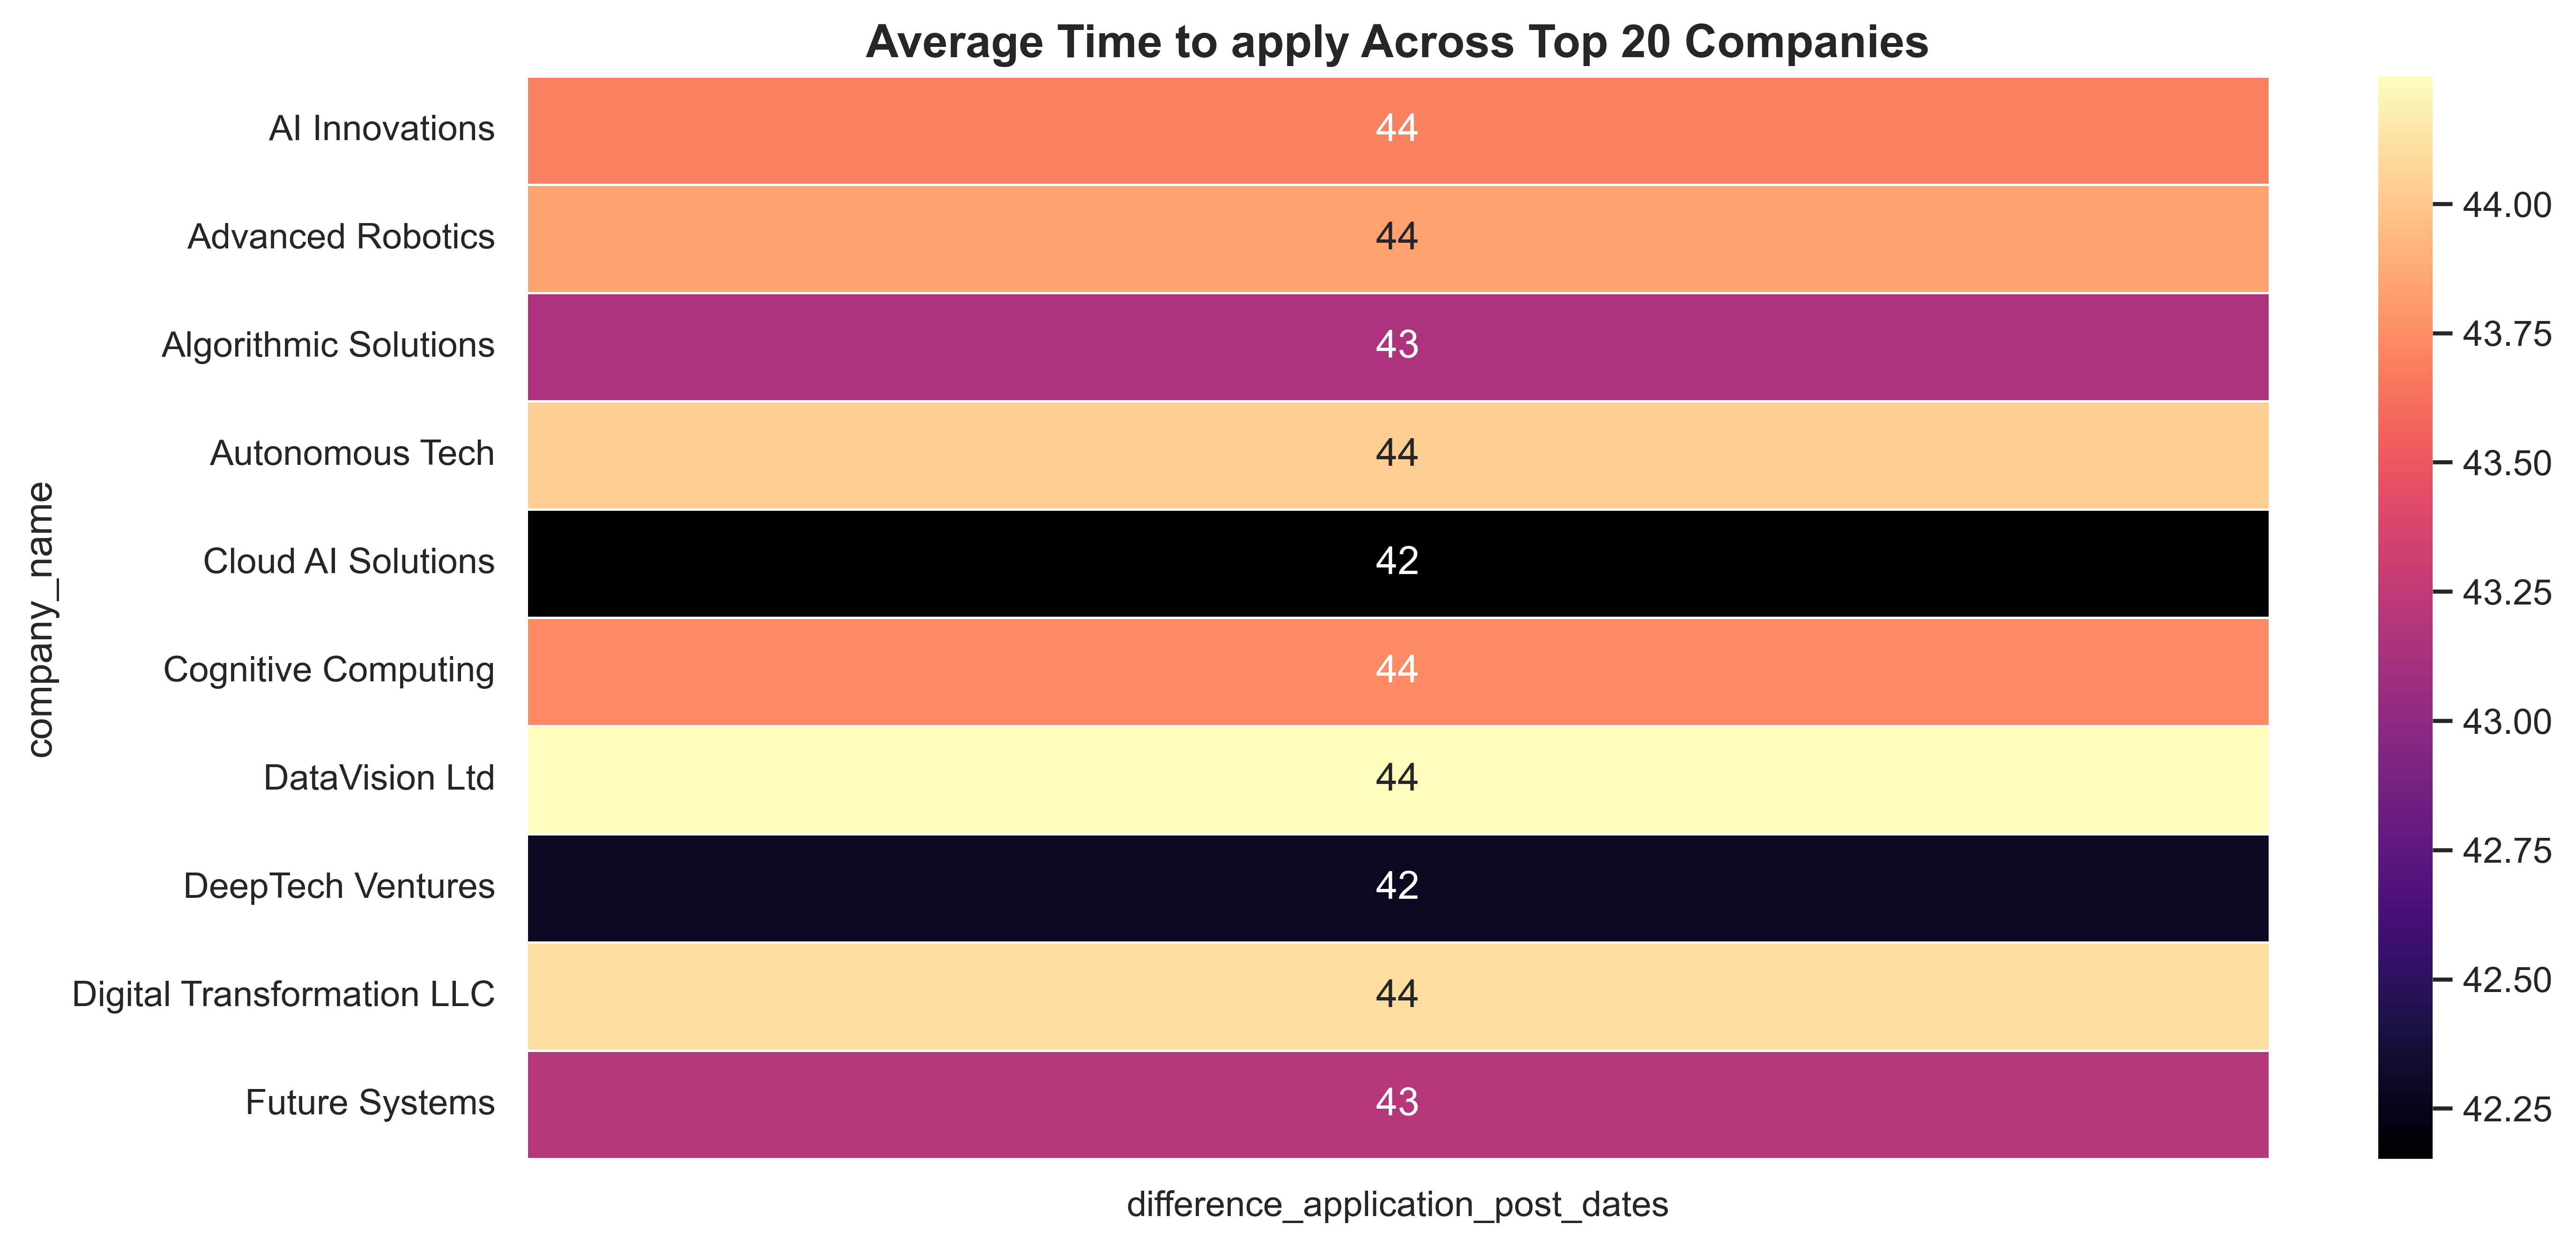

In [86]:
plt.figure(figsize=(12,6),dpi = 500)
sns.heatmap(heatmap_data , annot=True , cmap = 'magma' , linewidths=0.5)
plt.title("Average Time to apply Across Top 20 Companies" , fontsize = 14 , fontweight = 'bold')


# 9 . Are there seasonal trends in job posting (more jobs posted in certain months) ?

In [87]:
posting_jobs =   ai_job['posting_date'].dt.month_name().value_counts().reset_index().head(5)
posting_jobs

posting_date  count
0        April   1927
1      January   1917
2        March   1854
3     February   1767
4     December    959

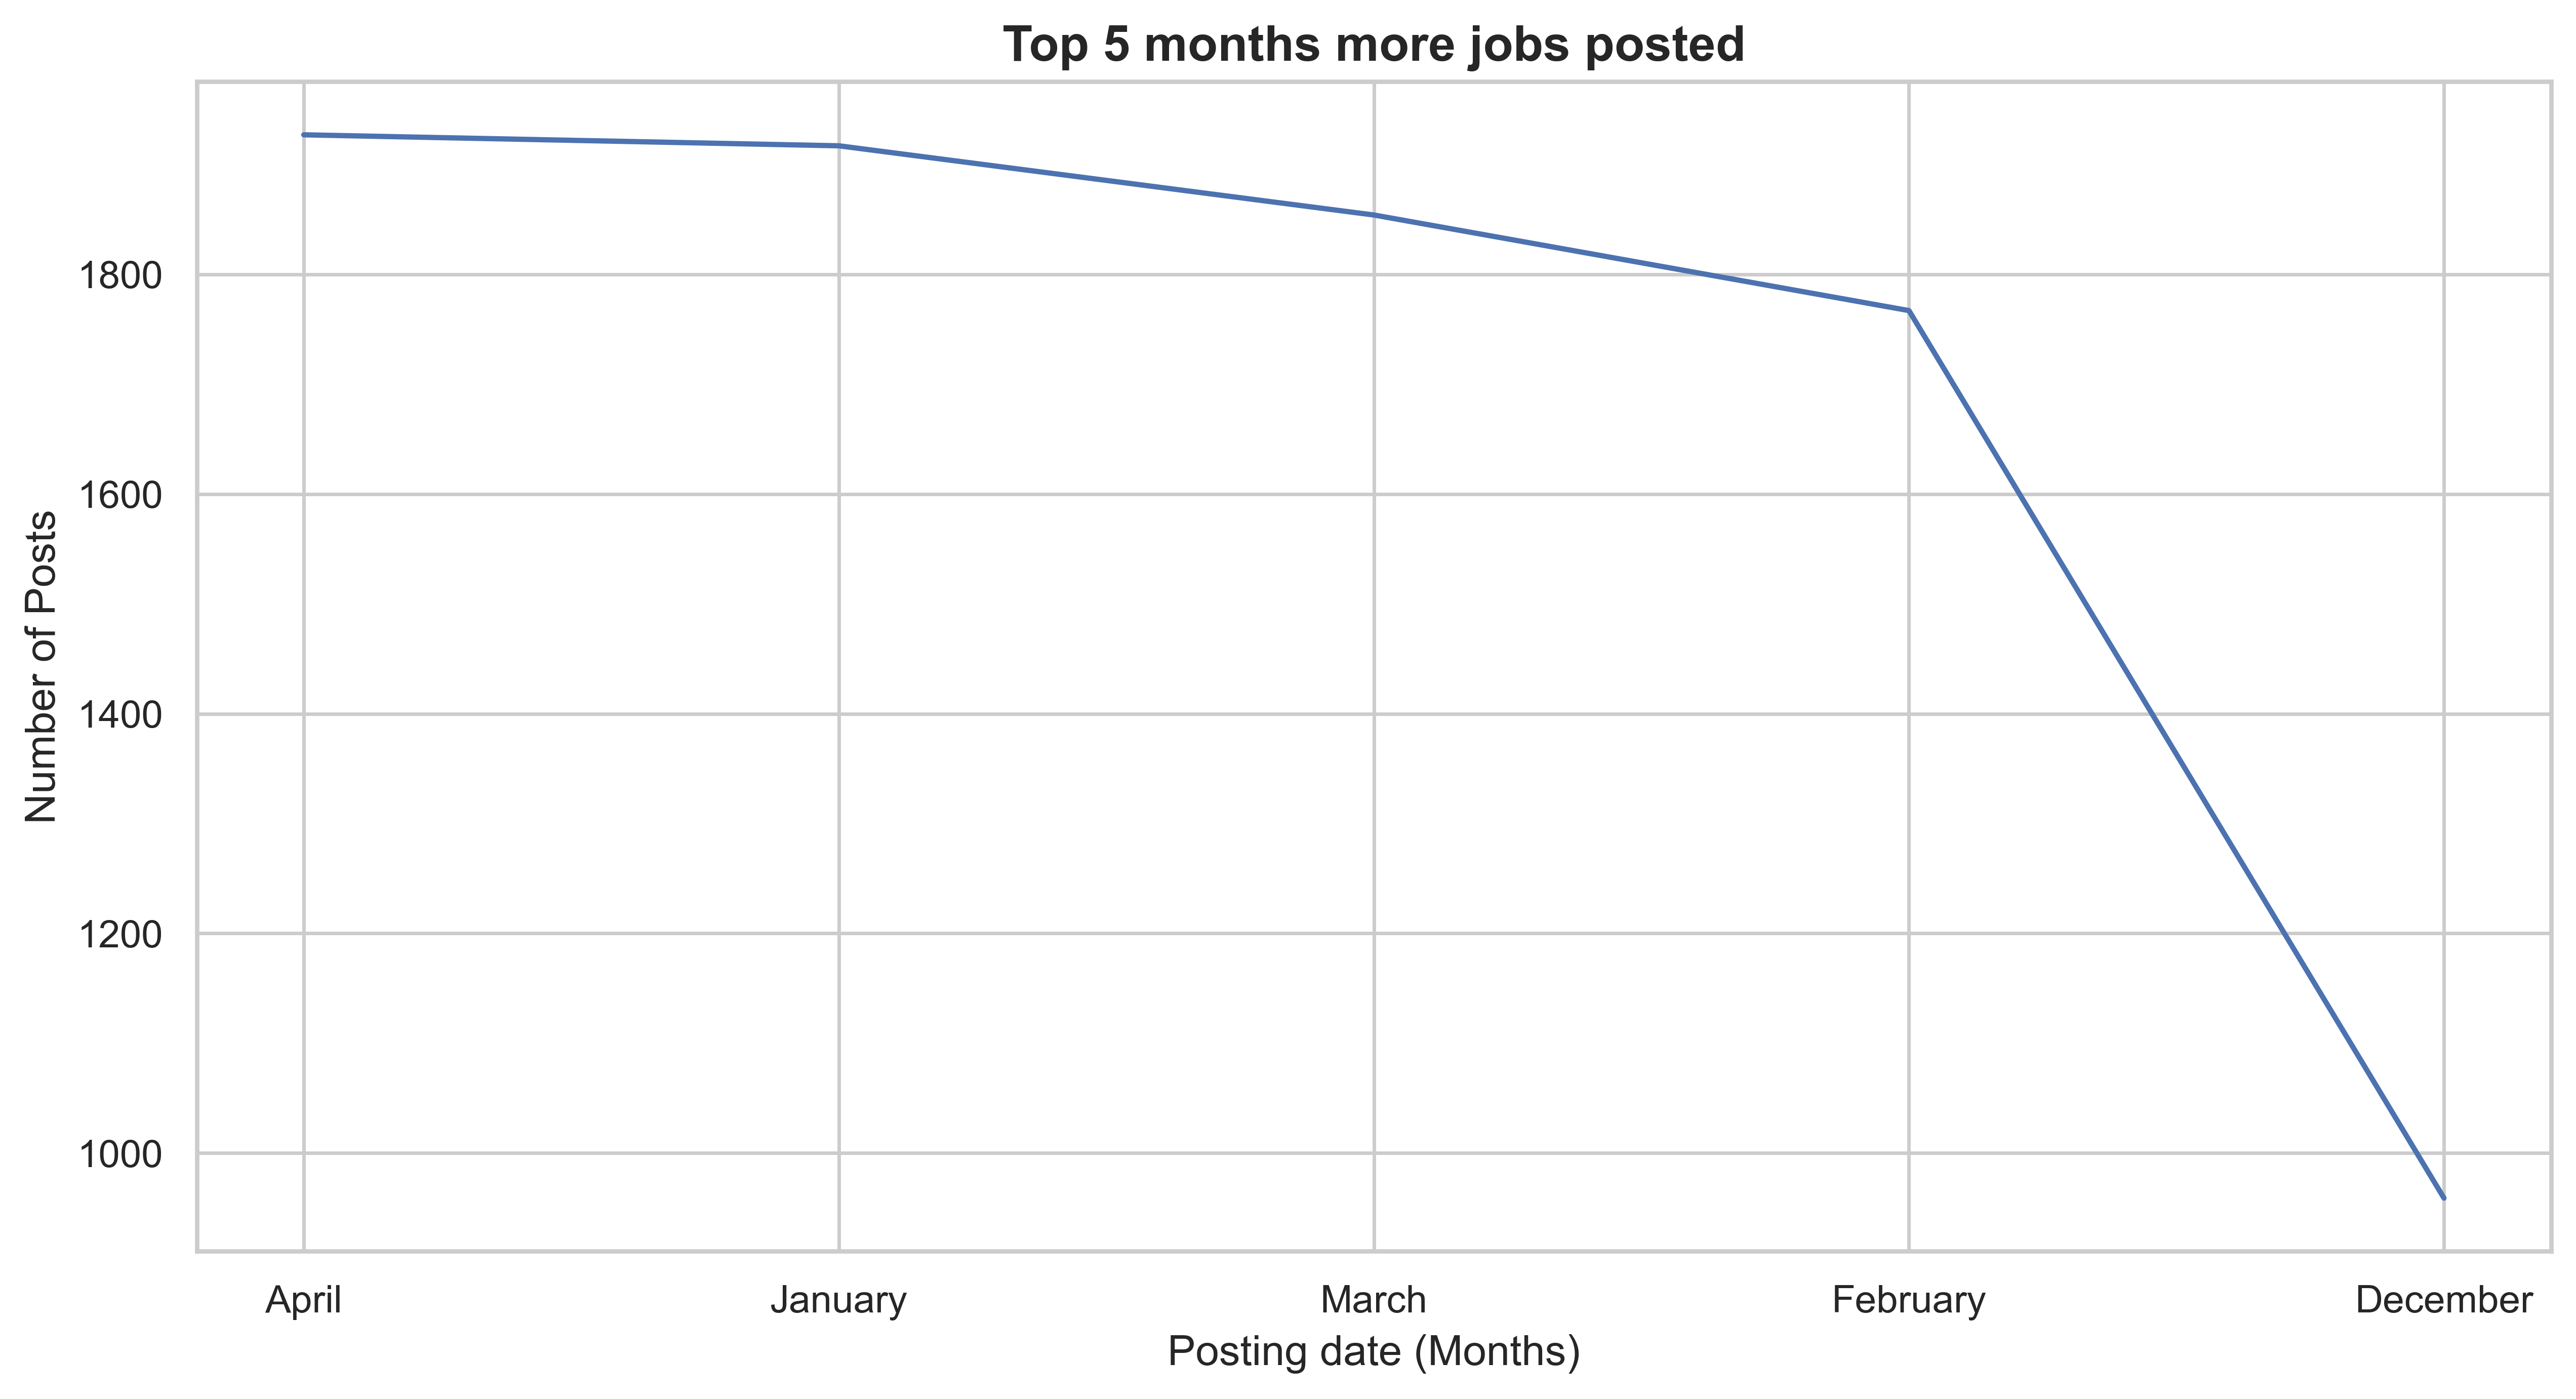

In [88]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,6),dpi = 500)
sns.lineplot(data = posting_jobs , x = 'posting_date' , y = 'count' ,markers='o')
plt.title("Top 5 months more jobs posted" , fontsize= 14 , fontweight = 'bold')
plt.xlabel('Posting date (Months)')
plt.ylabel('Number of Posts')
plt.show()

#  10. Which skill are most frequently required in AI jobs posting ?  

In [89]:
ai_job_filtered = ai_job[ai_job['job_title'].str.contains('AI',case=False,na=False)]
print(ai_job_filtered['job_title'])

0        AI Research Scientist
1         AI Software Engineer
2                AI Specialist
4                AI Consultant
5                 AI Architect
                 ...          
14981       AI Product Manager
14983             AI Architect
14985             AI Architect
14987    AI Research Scientist
14998               Head of AI
Name: job_title, Length: 5251, dtype: object


In [90]:
skill_group = ai_job_filtered.groupby(['job_title','required_skills']).size().reset_index(name='count')

In [91]:
Top_10_skill = skill_group.sort_values(by='required_skills',ascending=False).head(10)


In [92]:
Top_10_skill 

job_title                                   required_skills  \
764            AI Architect            TensorFlow, Tableau, Java, Mathematics   
763            AI Architect                          TensorFlow, Tableau, Git   
2955  AI Research Scientist                          TensorFlow, Tableau, Git   
3734   AI Software Engineer                          TensorFlow, Tableau, GCP   
4456          AI Specialist  TensorFlow, Statistics, Python, Git, Mathematics   
2206     AI Product Manager        TensorFlow, Statistics, Data Visualization   
3733   AI Software Engineer            TensorFlow, Spark, PyTorch, Azure, Git   
2205     AI Product Manager         TensorFlow, Spark, MLOps, Computer Vision   
5219             Head of AI                            TensorFlow, Spark, Git   
3732   AI Software Engineer                TensorFlow, Spark, Computer Vision   

      count  
764       1  
763       1  
2955      1  
3734      1  
4456      1  
2206      1  
3733      1  
2205      1  
5219      1  
3732      1

Text(0.5, 1.0, 'Top 10 Skills that are requried by the AI job posting')

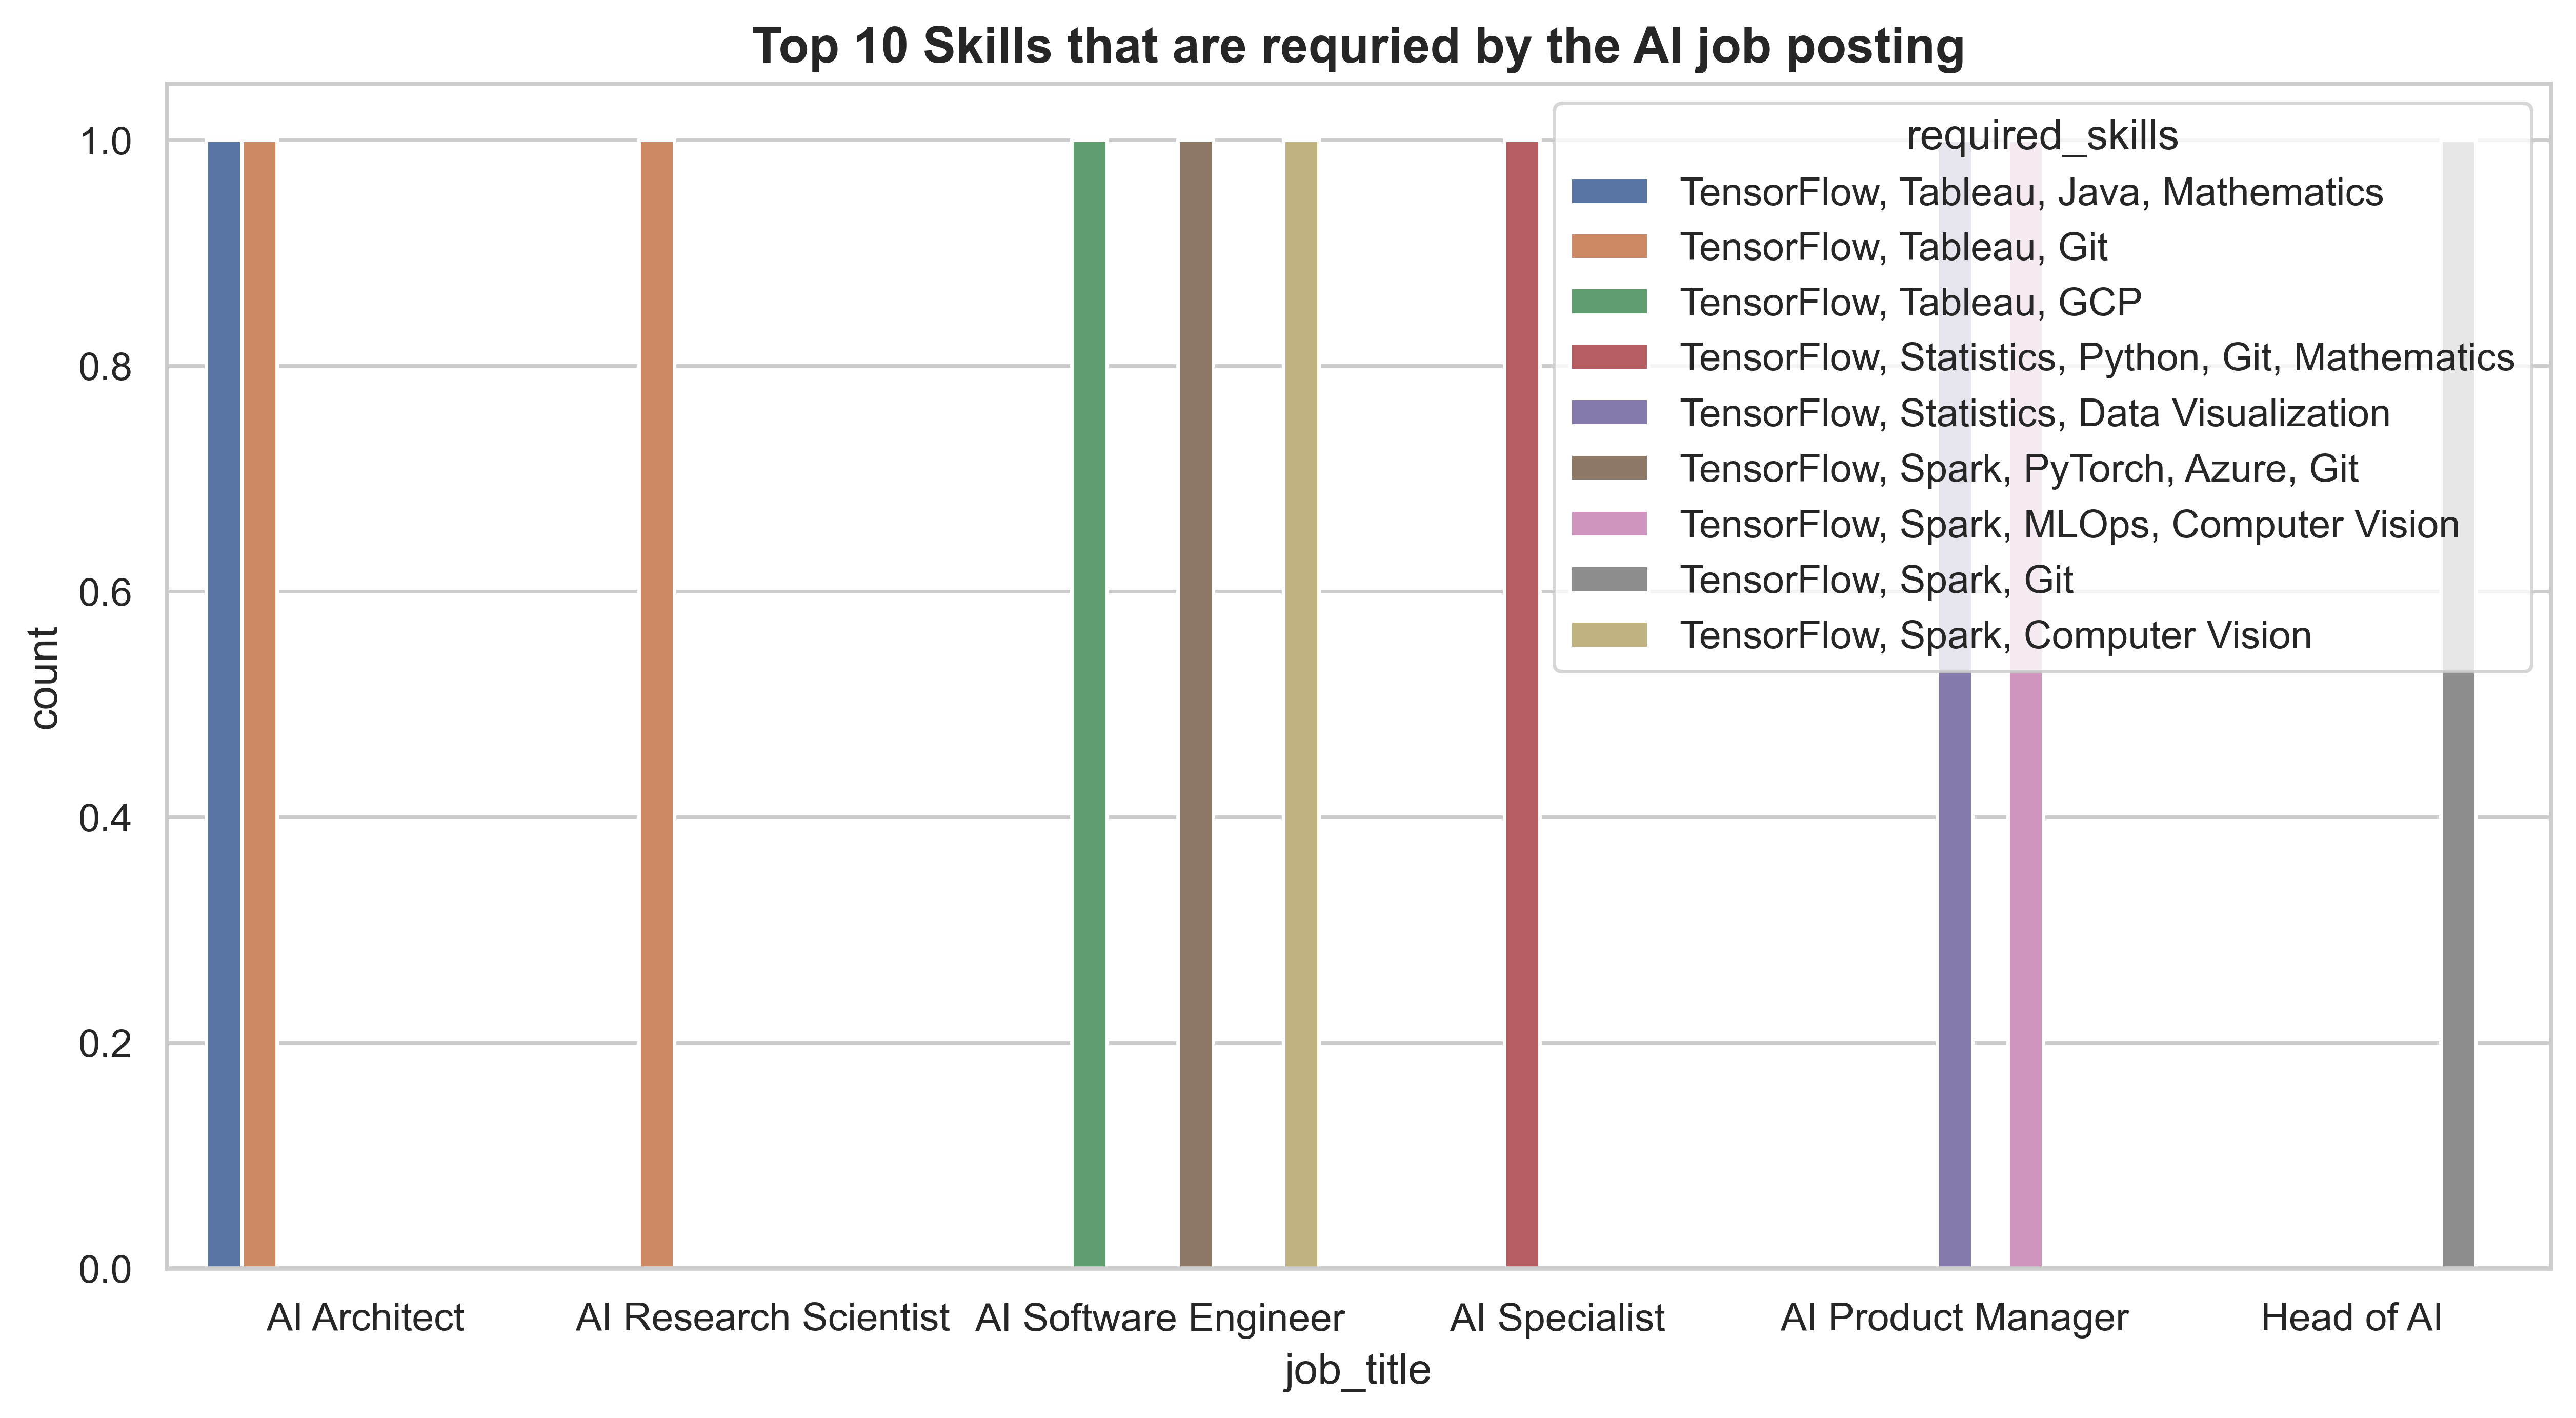

In [93]:
plt.figure(figsize=(12,6),dpi = 500)
sns.barplot(data = Top_10_skill , x = 'job_title' , y = 'count' , hue = 'required_skills')
plt.title('Top 10 Skills that are requried by the AI job posting' , fontsize = 14 , fontweight = 'bold')

Also find the top skills 

In [94]:
skills =ai_job['required_skills'].value_counts().reset_index().head(10)

C:\Users\ragha\AppData\Local\Temp\ipykernel_19676\2763395551.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax  =sns.barplot(data = skills , x = 'required_skills' , y = 'count'   ,  palette='Dark2')
C:\Users\ragha\AppData\Local\Temp\ipykernel_19676\2763395551.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = skills , x = 'required_skills' , y = 'count'   , palette='Dark2')
C:\Users\ragha\AppData\Local\Temp\ipykernel_19676\2763395551.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = skills , x = 'required_skills' , y = 'count' , palette='Dark2')


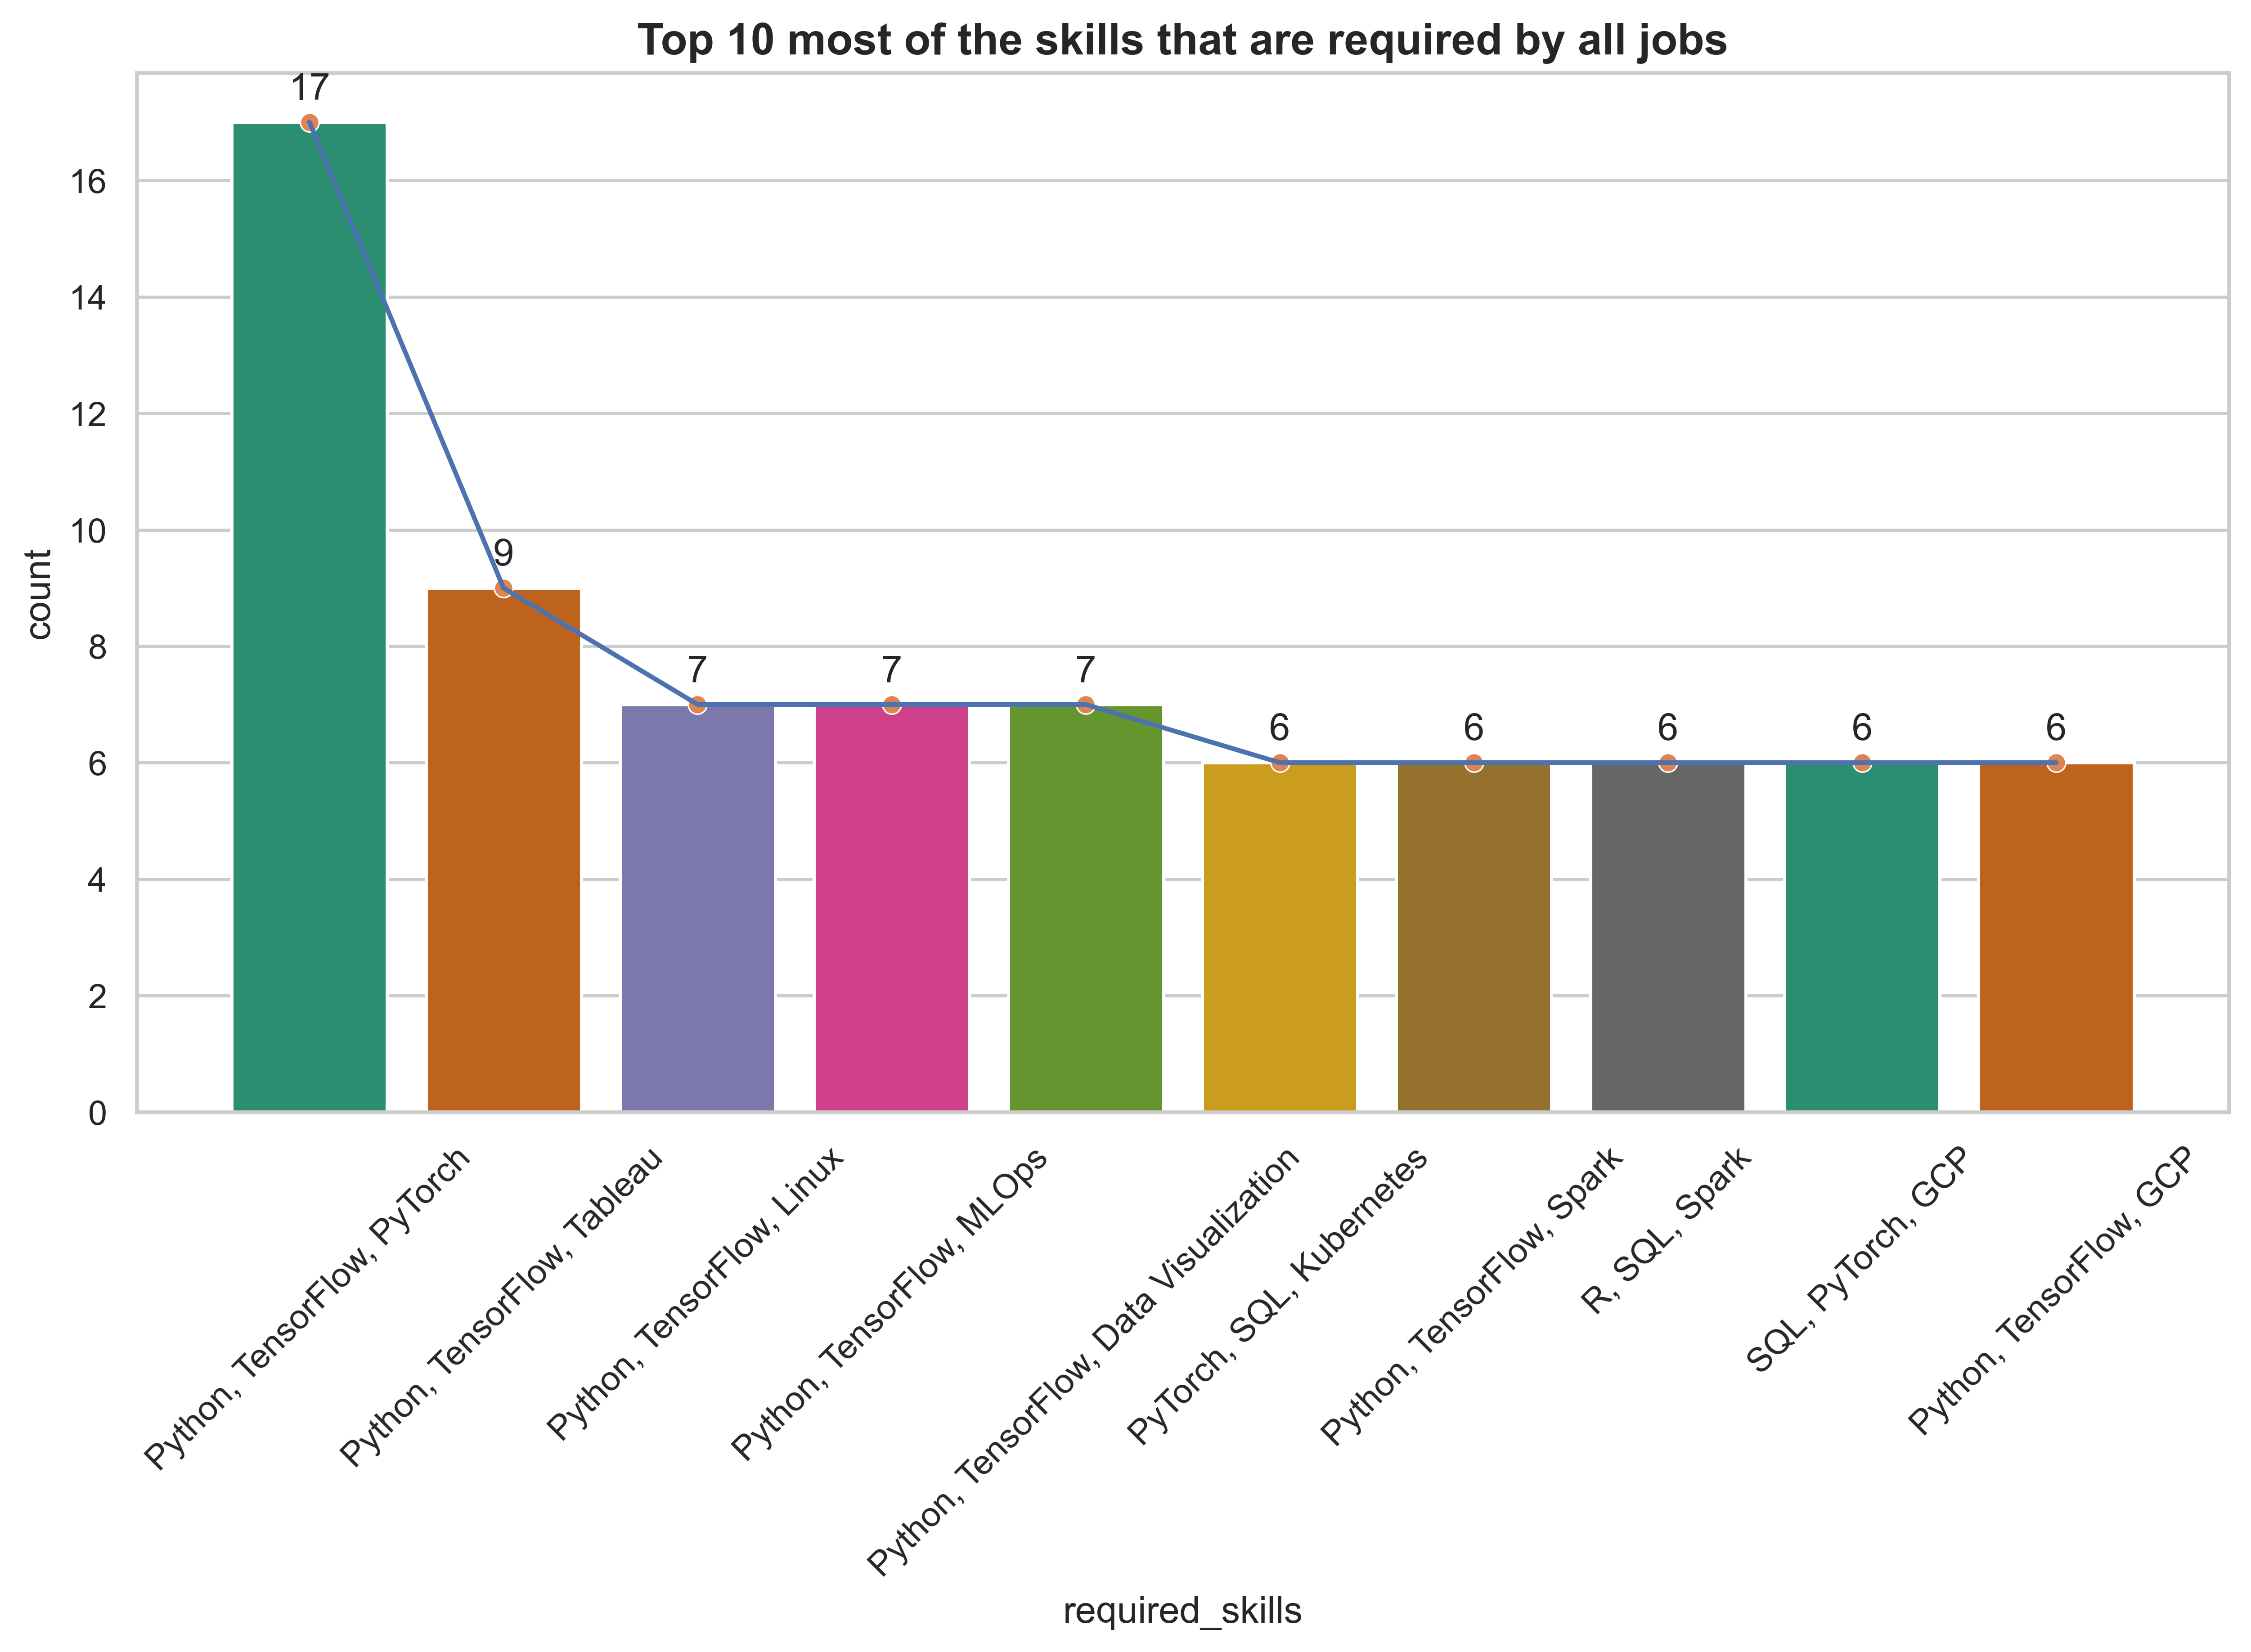

In [95]:
plt.figure(figsize=(12,6) , dpi = 500)
ax  =sns.barplot(data = skills , x = 'required_skills' , y = 'count'   ,  palette='Dark2')
sns.lineplot(data = skills , x = 'required_skills' , y = 'count'   , palette='Dark2')
sns.scatterplot(data = skills , x = 'required_skills' , y = 'count' , palette='Dark2')
plt.xticks(rotation = 45 )
for i in ax.containers:
    ax.bar_label(i ,padding=5 )
plt.title("Top 10 most of the skills that are required by all jobs" , fontsize = 14 , fontweight = 'bold')
plt.show()

# 11. Is there a correlation between the number of required skills and the job description lenght ? 

In [96]:
ai_job['num_skills']
job_description_length  = ai_job['required_skills'].apply(lambda x : len(x.split(',')) if pd.notnull(x) else 0) 

KeyError: 'num_skills'

In [ ]:
correlation = ai_job['num_skills'].corr(ai_job['job_description_length'])

In [ ]:
correlation 

np.float64(0.015142205491730705)

Text(0.5, 1.0, 'Correlation between Required Skills and job Description lenght')

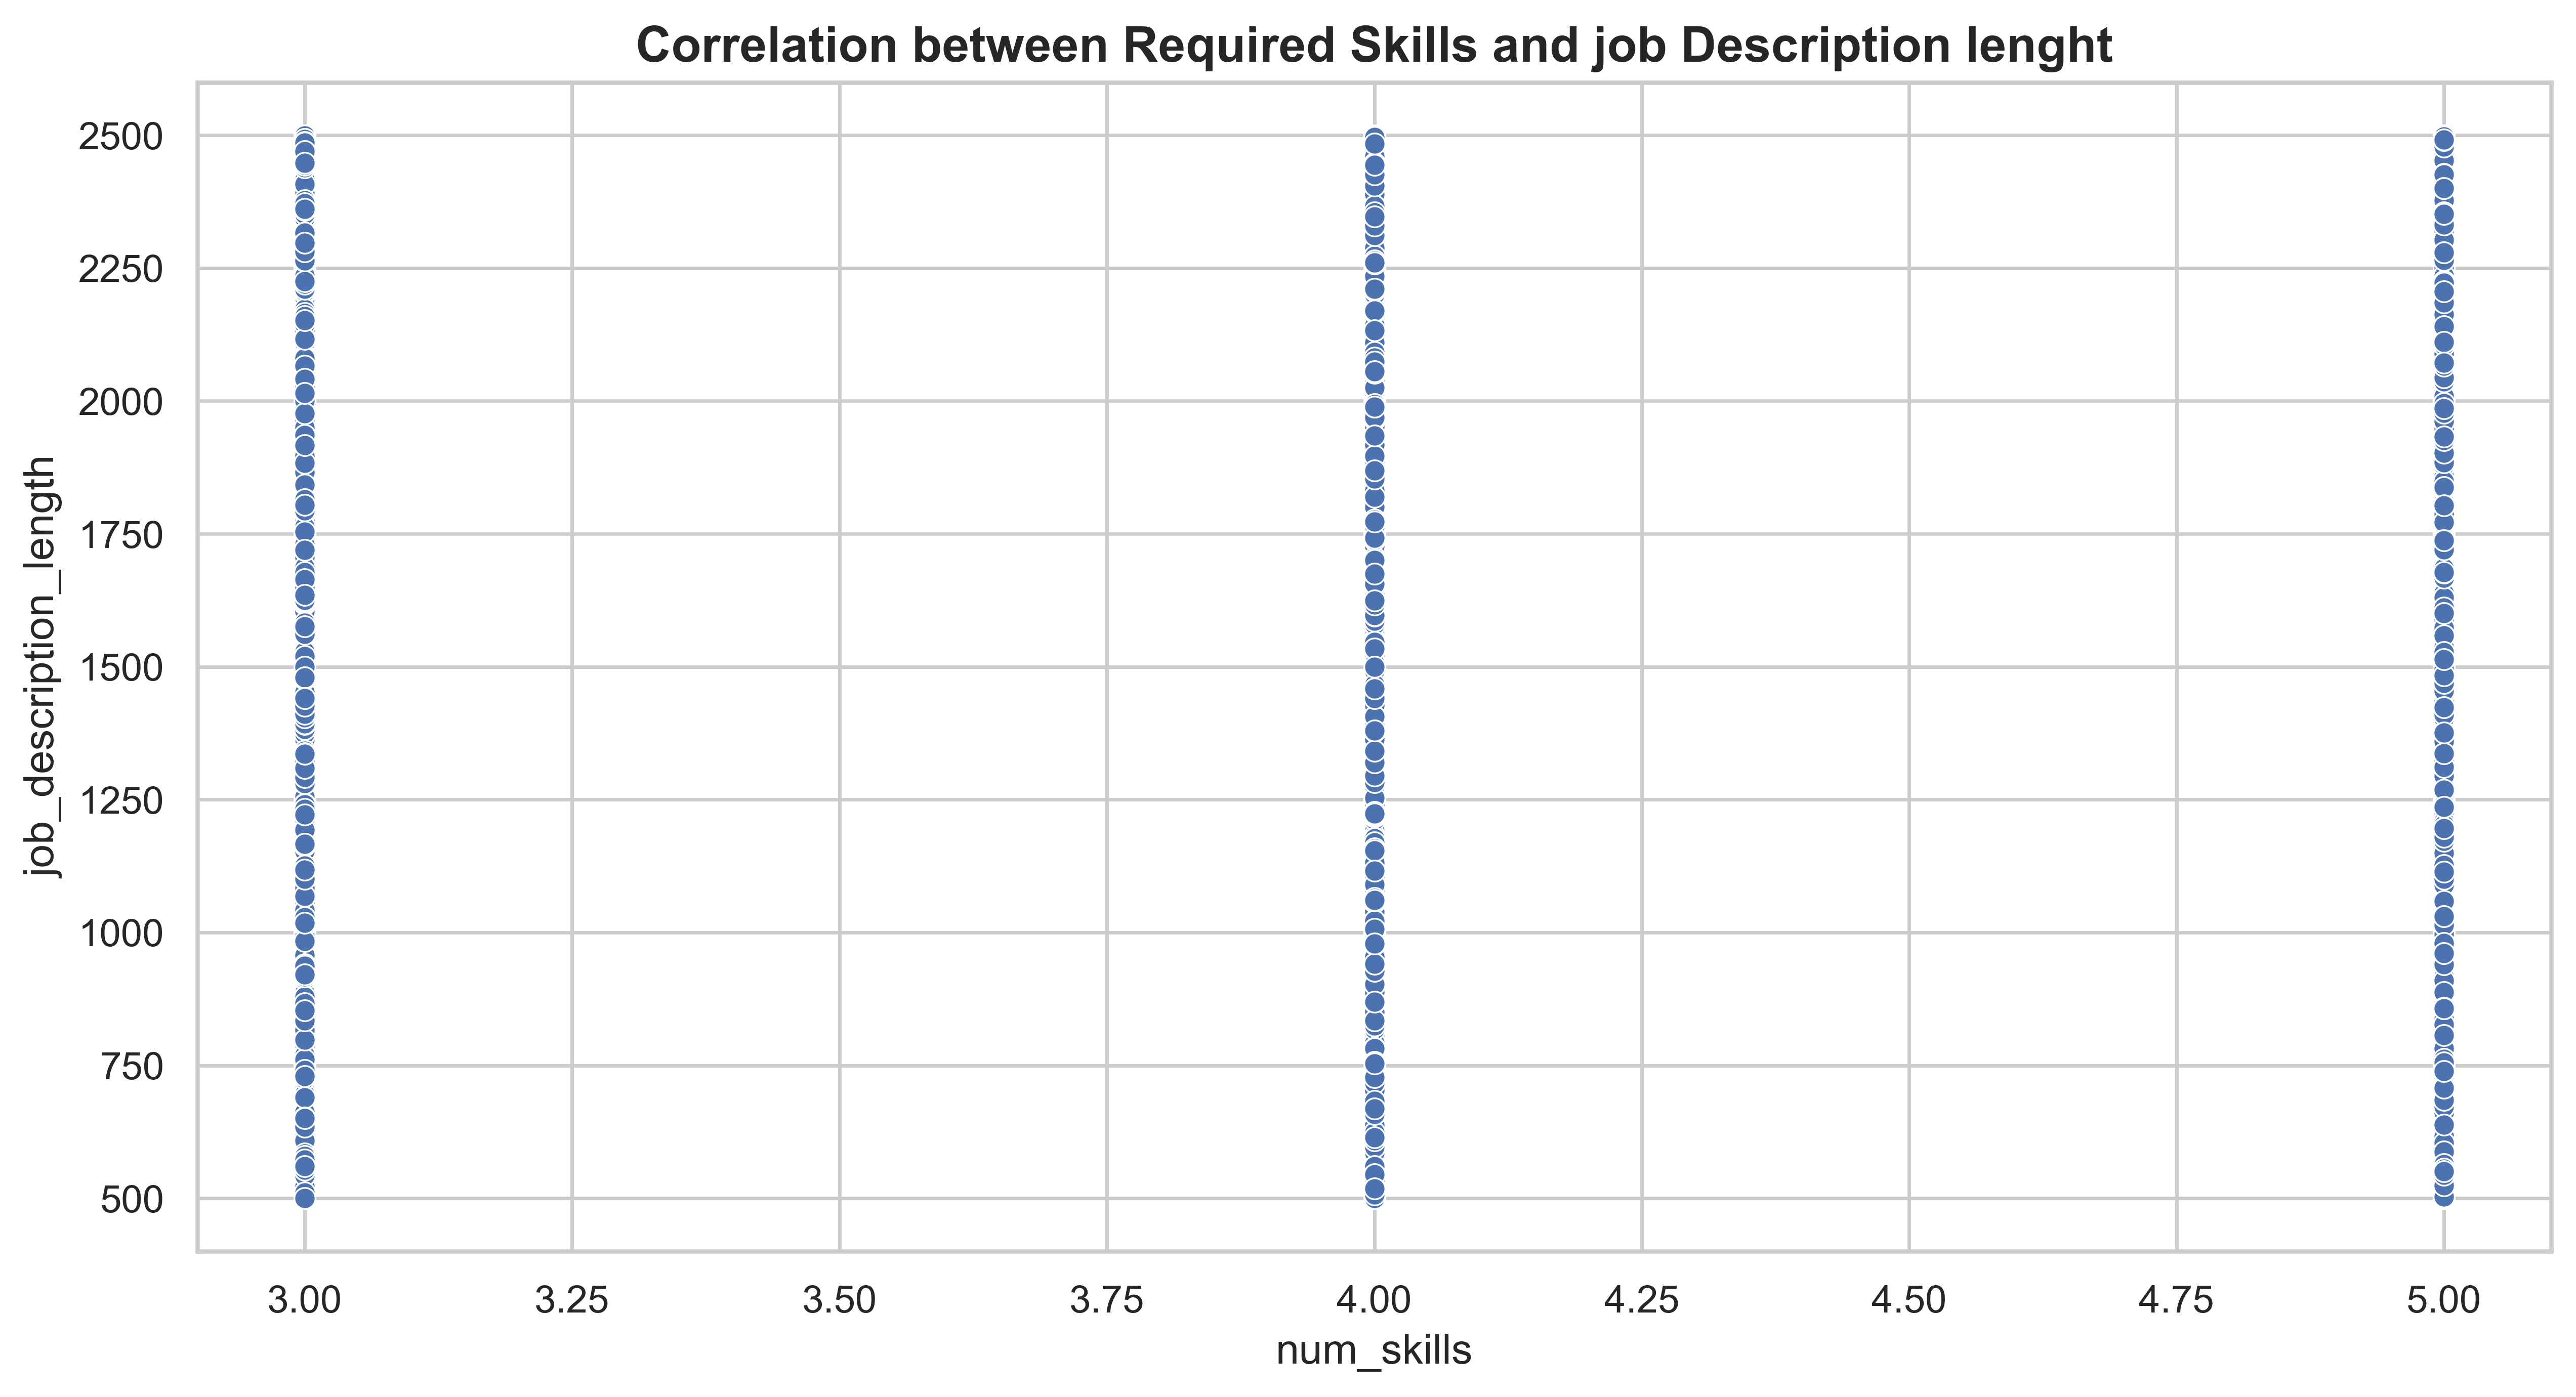

In [ ]:
plt.figure(figsize=(12,6),dpi = 500)
sns.scatterplot(x = 'num_skills', y = 'job_description_length' ,data = ai_job)
plt.title("Correlation between Required Skills and job Description lenght" , fontsize = 14 , fontweight = 'bold')

In [ ]:
ai_job.to_csv("Ai_job.csv")

: 